In [3]:
#Importing Necessary Libraries.
import pandas as pd
import numpy as np
import math
from collections import Counter
from sympy import Point, Line, Segment
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
from decimal import Decimal, getcontext

In [5]:
#Importing raw data and normalizing it.
Normalized_PCdata = pd.read_excel("Defect count per stretch.xlsx")
Normalized_PCdata_1 = Normalized_PCdata.set_index("STRETCH NO.")

print("Raw Input Data: \n", Normalized_PCdata_1)
print("\n")

max_values_cols = Normalized_PCdata_1.max()
max_values_cols = list(max_values_cols)

max_values_row = pd.Series(max_values_cols, index = Normalized_PCdata_1.columns)
Normalized_PCdata_2 = Normalized_PCdata_1.append(max_values_row, ignore_index=True)

Norm_decision = dict()
print("Enter for the given criterias - MAX given High Priority or MIN given High Priority.")
print("If Max given High Priority, Enter 1.")
print("If Min given High Priority, Enter 0.\n")
for i in Normalized_PCdata_2.columns:
    print("Criteria: ", i)
    pos_neg = int(input("Max/Min: "))
    Norm_decision[i] = pos_neg
Norm_decision_list = list(Norm_decision.values())

for i in range(0, len(Normalized_PCdata_2.columns)):
    m = Normalized_PCdata_2.iloc[-1,i]
    n = Norm_decision_list.pop(0)
    for j in range(0, len(Normalized_PCdata_2)-1):
        if n == 1:
            Normalized_PCdata_1.iloc[j,i] = math.floor((Normalized_PCdata_1.iloc[j,i] * 100) / m)
        else:
            Normalized_PCdata_1.iloc[j,i] = math.floor(100-((Normalized_PCdata_1.iloc[j,i] * 100) / m))
print("\n")
print("Normalized Data: \n",Normalized_PCdata_1)
Normalized_PCdata_1.to_excel("Normalized Data Sheet.xlsx")

Raw Input Data: 
              A_L  A_M  A_H  B_L  B_M  B_H  L_L  L_M  L_H  T_L  ...  P_M  P_H  \
STRETCH NO.                                                    ...             
S1             2    1    0    4    3    1    8    4    3    6  ...    1    0   
S2             3    2    1    8    4    2   11    4    2   10  ...    1    0   
S3             4    3    2    3    1    1    9    2    1    7  ...    1    0   
S4             1    1    1    6    3    2   10    5    2    9  ...    1    0   
S5             2    3    2    3    2    1   10    4    1    8  ...    1    1   
S6             5    1    2    4    3    1   13    5    3    7  ...    0    0   
S7             3    2    1    5    2    0   11    6    2    6  ...    2    0   
S8             4    1    0    3    2    1   12    5    3   14  ...    3    2   
S9             2    2    1    5    2    1   10    5    3    5  ...    1    1   
S10            1    1    0    7    4    3   14    5    0   12  ...    1    1   
S11            0    0 

Max/Min:  1


Criteria:  A_M


Max/Min:  1


Criteria:  A_H


Max/Min:  1


Criteria:  B_L


Max/Min:  1


Criteria:  B_M


Max/Min:  1


Criteria:  B_H


Max/Min:  1


Criteria:  L_L


Max/Min:  1


Criteria:  L_M


Max/Min:  1


Criteria:  L_H


Max/Min:  1


Criteria:  T_L


Max/Min:  1


Criteria:  T_M


Max/Min:  1


Criteria:  T_H


Max/Min:  1


Criteria:  PH_L


Max/Min:  1


Criteria:  PH_M


Max/Min:  1


Criteria:  PH_H


Max/Min:  1


Criteria:  RA_L


Max/Min:  1


Criteria:  RA_M


Max/Min:  1


Criteria:  RA_H


Max/Min:  1


Criteria:  R_L


Max/Min:  1


Criteria:  R_M


Max/Min:  1


Criteria:  R_H


Max/Min:  1


Criteria:  S_L


Max/Min:  1


Criteria:  S_M


Max/Min:  1


Criteria:  S_H


Max/Min:  1


Criteria:  E_L


Max/Min:  1


Criteria:  E_M


Max/Min:  1


Criteria:  E_H


Max/Min:  1


Criteria:  D_L


Max/Min:  1


Criteria:  D_M


Max/Min:  1


Criteria:  D_H


Max/Min:  1


Criteria:  P_L


Max/Min:  1


Criteria:  P_M


Max/Min:  1


Criteria:  P_H


Max/Min:  1


Criteria:  M_L


Max/Min:  1


Criteria:  M_M


Max/Min:  1


Criteria:  M_H


Max/Min:  1


Criteria:  POP


Max/Min:  1


Criteria:  VOL


Max/Min:  1


Criteria:  FS


Max/Min:  1


Criteria:  NTOWN


Max/Min:  0


Criteria:  CBR


Max/Min:  0




Normalized Data: 
              A_L  A_M  A_H  B_L  B_M  B_H  L_L  L_M  L_H  T_L  ...  P_M  P_H  \
STRETCH NO.                                                    ...             
S1            40   33    0   40   42   33   44   36   37   27  ...   33    0   
S2            60   66   25   80   57   66   61   36   25   45  ...   33    0   
S3            80  100   50   30   14   33   50   18   12   31  ...   33    0   
S4            20   33   25   60   42   66   55   45   25   40  ...   33    0   
S5            40  100   50   30   28   33   55   36   12   36  ...   33   50   
S6           100   33   50   40   42   33   72   45   37   31  ...    0    0   
S7            60   66   25   50   28    0   61   54   25   27  ...   66    0   
S8            80   33    0   30   28   33   66   45   37   63  ...  100  100   
S9            40   66   25   50   28   33   55   45   37   22  ...   33   50   
S10           20   33    0   70   57  100   77   45    0   54  ...   33   50   
S11            0   

In [6]:
#Creating Rating Matrix for Normalized Values.
Rating_Matrix = []
for i in range(0, len(Normalized_PCdata_1.columns)):
    for j in range(0, len(Normalized_PCdata_1)):
        if Normalized_PCdata_1.iloc[j,i] >= 0 and Normalized_PCdata_1.iloc[j,i] <= 10:
            Rating_Matrix.append(1)
        elif Normalized_PCdata_1.iloc[j,i] >= 11 and Normalized_PCdata_1.iloc[j,i] <= 20:
            Rating_Matrix.append(2)
        elif Normalized_PCdata_1.iloc[j,i] >= 21 and Normalized_PCdata_1.iloc[j,i] <= 30:
            Rating_Matrix.append(3)
        elif Normalized_PCdata_1.iloc[j,i] >= 31 and Normalized_PCdata_1.iloc[j,i] <= 40:
            Rating_Matrix.append(4)
        elif Normalized_PCdata_1.iloc[j,i] >= 41 and Normalized_PCdata_1.iloc[j,i] <= 50:
            Rating_Matrix.append(5)
        elif Normalized_PCdata_1.iloc[j,i] >= 51 and Normalized_PCdata_1.iloc[j,i] <= 60:
            Rating_Matrix.append(6)
        elif Normalized_PCdata_1.iloc[j,i] >= 61 and Normalized_PCdata_1.iloc[j,i] <= 70:
            Rating_Matrix.append(7)
        elif Normalized_PCdata_1.iloc[j,i] >= 71 and Normalized_PCdata_1.iloc[j,i] <= 80:
            Rating_Matrix.append(8)
        elif Normalized_PCdata_1.iloc[j,i] >= 81 and Normalized_PCdata_1.iloc[j,i] <= 90:
            Rating_Matrix.append(9)
        elif Normalized_PCdata_1.iloc[j,i] >= 91 and Normalized_PCdata_1.iloc[j,i] <= 100:
            Rating_Matrix.append(10)

cols = len(Normalized_PCdata_1)
rows = len(Normalized_PCdata_1.columns)
Rating_Matrix = np.array(Rating_Matrix)
Rating_Matrix = Rating_Matrix.reshape(rows,cols)
Rating_Matrix = Rating_Matrix.transpose()
print(Rating_Matrix)

[[ 4  4  1  4  5  4  5  4  4  3  8  5  2  3  1  5  4 10  1  1  1  2  1  1
   6  5  5  7  6  5  2  4  1  2  2  1  3  1  6  2  7]
 [ 6  7  3  8  6  7  7  4  3  5  3 10  5  5 10  5  4  5  1  1  1  4  4  1
   9  3  5  5  4 10  3  4  1  5  1  1  6  4  7  3  7]
 [ 8 10  5  3  2  4  5  2  2  4  3  5  4  3 10  7  3  3  1  1  1  2  1  1
   5  5  1  4  2  5  2  4  1  5  5  1  7  6  5  1  6]
 [ 2  4  3  6  5  7  6  5  3  4  4 10  7  5 10  6  5  7  1  1  1  4 10  1
   9  5  5  5  6  5  4  4  1  6  6  1  7  4 10  4  5]
 [ 4 10  5  3  3  4  6  4  2  4  3  5  5  5 10  5  4  8  6 10 10  6  7  5
  10  8 10  7  8 10  2  4  5  5  5  1  5  8  9  1  3]
 [10  4  5  4  5  4  8  5  4  4  2 10  4  3 10  6  5  5  1  1  1  8  7 10
   8  3  5  3 10  5  3  1  1  4  3  2  7  8  5  6  6]
 [ 6  7  3  5  3  1  7  6  3  3  4 10  5  3 10  6  4  2  1  1  1 10 10  5
   6  5 10  4  8 10  3  7  1  4  2  1  7  8  8  8  8]
 [ 8  4  1  3  3  4  7  5  4  7  7  1  4  3 10  6  5  3  1  1  1  4  4  5
   8  8  5  9  6  5  5 10 10  

In [7]:
#Importing Experts Opinion and obtaining Fuzzy weights for various distress parameters.
Expert_survey = pd.read_excel("MCDM Expert Survey_1.xlsx")
Expert_survey_1 = Expert_survey.set_index("CRITERIA")

Triangular_Fuzzy_nos_1 = {"N": 0, "L": 0, "M": 0.3, "H": 0.7, "VH": 0.9}
Triangular_Fuzzy_nos_2 = {"N": 0, "L": 0.1, "M": 0.5, "H": 0.9, "VH": 1}
Triangular_Fuzzy_nos_3 = {"N": 0.1, "L": 0.3, "M": 0.7, "H": 1, "VH": 1}

Expert_survey_counts = pd.get_dummies(Expert_survey_1, prefix_sep='', prefix='').sum(axis=1, level=0)
Expert_survey_counts = Expert_survey_counts.to_dict(orient='records')

Fuzzy_wts_1 = []
inp1 = Counter(Triangular_Fuzzy_nos_1)
for i in Expert_survey_counts:
    inp2 = Counter(i)
    res = Counter({key : inp1[key] * inp2[key] for key in inp1})
    Fuzzy_wts_1.append(res)
    
Fuzzy_wts_2 = []
inp1 = Counter(Triangular_Fuzzy_nos_2)
for i in Expert_survey_counts:
    inp2 = Counter(i)
    res = Counter({key : inp1[key] * inp2[key] for key in inp1})
    Fuzzy_wts_2.append(res)
    
Fuzzy_wts_3 = []
inp1 = Counter(Triangular_Fuzzy_nos_3)
for i in Expert_survey_counts:
    inp2 = Counter(i)
    res = Counter({key : inp1[key] * inp2[key] for key in inp1})
    Fuzzy_wts_3.append(res)
    
Fuzzy_wts = []
for i in range(0,len(Expert_survey_1)):
    weight_vals = []
    col1 = round(sum(list(Fuzzy_wts_1[i].values())),3)
    col2 = round(sum(list(Fuzzy_wts_2[i].values())),3)
    col3 = round(sum(list(Fuzzy_wts_3[i].values())),3)
    weight_vals.extend([col1,col2,col3])
    Fuzzy_wts.append(weight_vals)
Fuzzy_wts = [[round(x/15, 3) for x in inner_list] for inner_list in Fuzzy_wts]

Fuzzy_wts = pd.DataFrame(Fuzzy_wts)
Fuzzy_wts["Criteria"] = Expert_survey["CRITERIA"]
Fuzzy_wts = Fuzzy_wts.set_index("Criteria")
print(Fuzzy_wts)
Fuzzy_wts.to_excel("Fuzzy wts.xlsx")

              0      1      2
Criteria                     
A_L       0.000  0.033  0.167
A_M       0.120  0.253  0.447
A_H       0.460  0.640  0.787
B_L       0.000  0.033  0.167
B_M       0.120  0.253  0.447
B_H       0.460  0.640  0.787
L_L       0.000  0.033  0.167
L_M       0.120  0.253  0.447
L_H       0.460  0.640  0.787
T_L       0.000  0.033  0.167
T_M       0.120  0.253  0.447
T_H       0.460  0.640  0.787
PH_L      0.180  0.333  0.527
PH_M      0.547  0.740  0.873
PH_H      0.847  0.973  1.000
RA_L      0.040  0.107  0.260
RA_M      0.193  0.327  0.500
RA_H      0.580  0.760  0.880
R_L       0.020  0.087  0.247
R_M       0.227  0.393  0.587
R_H       0.607  0.787  0.900
S_L       0.000  0.033  0.167
S_M       0.120  0.253  0.447
S_H       0.460  0.640  0.787
E_L       0.020  0.080  0.233
E_M       0.240  0.387  0.560
E_H       0.627  0.787  0.880
D_L       0.020  0.087  0.247
D_M       0.227  0.393  0.587
D_H       0.607  0.787  0.900
P_L       0.060  0.133  0.287
P_M       

In [8]:
#Obtaining Fuzzy Evaluation Values for all stretches.
Rating_Matrix = np.array(Rating_Matrix)
Fuzzy_wts = np.array(Fuzzy_wts)
Fuzzy_Eval_vals = np.dot(Rating_Matrix, Fuzzy_wts)

Fuzzy_Eval_vals = pd.DataFrame(Fuzzy_Eval_vals)
Fuzzy_Eval_vals.columns = ["l","m","n"]
print("Total no of stretches: " + str(len(Fuzzy_Eval_vals)))

row_index = ['A' + str(i) for i in range(1, len(Fuzzy_Eval_vals)+1)]
Fuzzy_Eval_vals["Stretch No."] = row_index
Fuzzy_Eval_vals_1 = Fuzzy_Eval_vals.set_index("Stretch No.")
print(Fuzzy_Eval_vals_1)
Fuzzy_Eval_vals_1.to_excel("Fuzzy Evaluation Values.xlsx")

Total no of stretches: 21
                  l        m        n
Stretch No.                          
A1           38.227   56.923   79.469
A2           53.725   77.293  105.182
A3           42.121   60.970   83.581
A4           55.882   81.619  112.025
A5           70.023  100.834  135.451
A6           56.945   82.369  112.446
A7           59.985   86.898  118.635
A8           57.746   84.475  116.671
A9           51.918   74.878  101.543
A10          54.645   80.873  113.169
A11          30.490   45.393   63.605
A12          54.049   82.085  118.637
A13          36.982   57.624   84.910
A14          37.089   56.646   80.859
A15          44.776   69.073   98.190
A16          14.688   21.615   29.658
A17          15.099   22.122   30.265
A18          20.256   29.266   39.800
A19          16.551   24.122   32.927
A20          18.326   26.513   35.625
A21          17.098   25.081   34.428


In [9]:
#Triangular Fuzzy Numbers Calculation.
Triangular_FuzzyNums = pd.DataFrame(columns = ['l','m','n'])
for i in range(0,len(Fuzzy_Eval_vals)):
    for j in range(0,len(Fuzzy_Eval_vals)):
        arr1 = Fuzzy_Eval_vals.loc[i]
        arr2 = Fuzzy_Eval_vals.loc[j]
        diff = [arr1[0]-arr2[2],arr1[1]-arr2[1],arr1[2]-arr2[0]]
        stretch_diff = pd.Series(diff, index = Triangular_FuzzyNums.columns)
        Triangular_FuzzyNums = Triangular_FuzzyNums.append(stretch_diff, ignore_index=True)

row_diff = ['p' + str(i) + "-" + "p" + str(j) for i in range(1, len(Fuzzy_Eval_vals)+1) for j in range(1, len(Fuzzy_Eval_vals)+1)]
Triangular_FuzzyNums["p~i-p~j"] = row_diff
Triangular_FuzzyNums_1 = Triangular_FuzzyNums.set_index("p~i-p~j")
print(Triangular_FuzzyNums_1)
Triangular_FuzzyNums_1.to_excel("Triangular Fuzzy Numbers.xlsx")

              l       m       n
p~i-p~j                        
p1-p1   -41.242   0.000  41.242
p1-p2   -66.955 -20.370  25.744
p1-p3   -45.354  -4.047  37.348
p1-p4   -73.798 -24.696  23.587
p1-p5   -97.224 -43.911   9.446
...         ...     ...     ...
p21-p17 -13.167   2.959  19.329
p21-p18 -22.702  -4.185  14.172
p21-p19 -15.829   0.959  17.877
p21-p20 -18.527  -1.432  16.102
p21-p21 -17.330   0.000  17.330

[441 rows x 3 columns]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 12872/23057)]


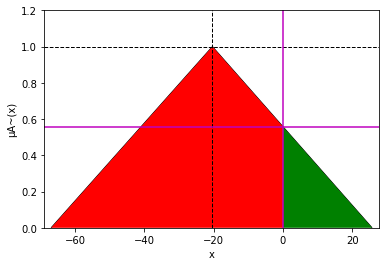

<Figure size 432x288 with 0 Axes>

[Point2D(0, 37348/41395)]


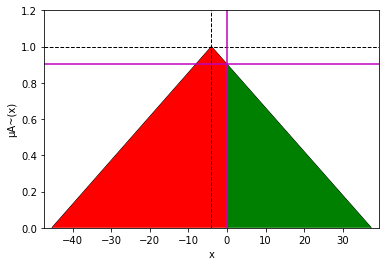

<Figure size 432x288 with 0 Axes>

[Point2D(0, 23587/48283)]


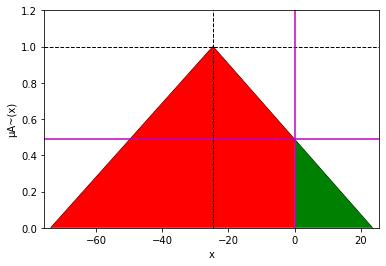

<Figure size 432x288 with 0 Axes>

[Point2D(0, 157433333333333/889283333333333)]


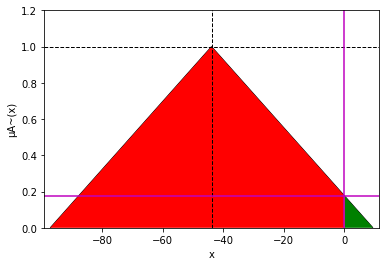

<Figure size 432x288 with 0 Axes>

[Point2D(0, 3754/7995)]


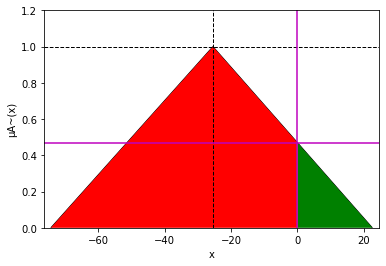

<Figure size 432x288 with 0 Axes>

[Point2D(0, 19484/49459)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 7241/16425)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 27551/45506)]


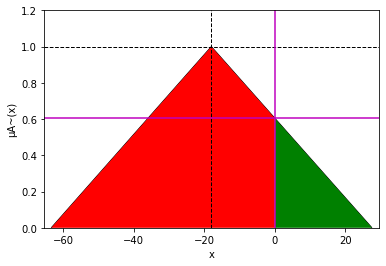

<Figure size 432x288 with 0 Axes>

[Point2D(0, 12412/24387)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 12689/18454)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 12710/25291)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 42487000000000000/43188000000000001)]


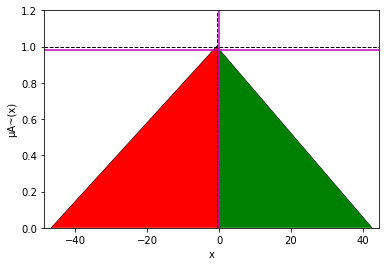

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5329000000000000/5363625000000001)]


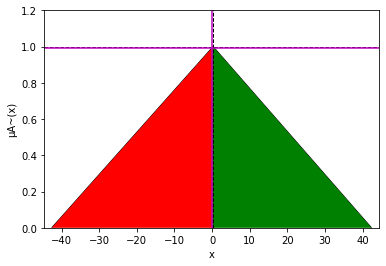

<Figure size 432x288 with 0 Axes>

[Point2D(0, 34693/46843)]


<Figure size 432x288 with 0 Axes>

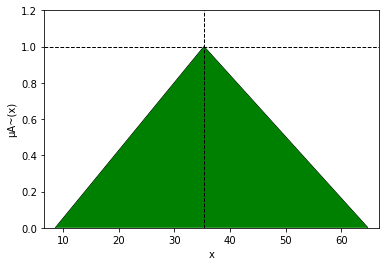

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 157300000000001/2923000000000001)]


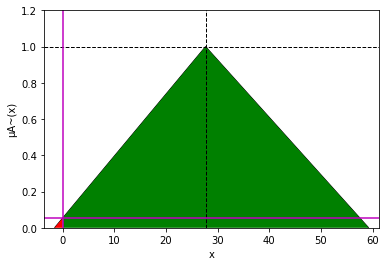

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

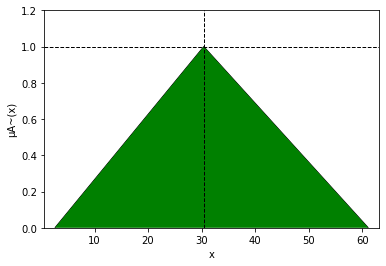

<Figure size 432x288 with 0 Axes>

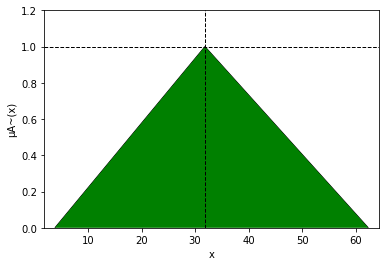

<Figure size 432x288 with 0 Axes>

[Point2D(0, 12872/23057)]


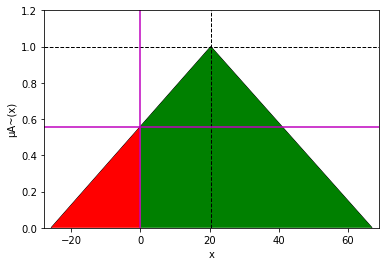

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 9952/15393)]


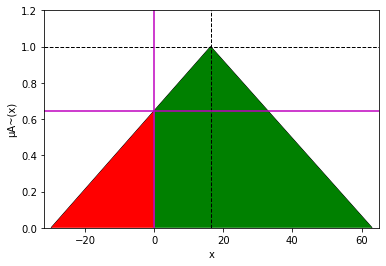

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2465000000000000/2681300000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 35159/58700)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 4823700000000000/5331299999999999)]


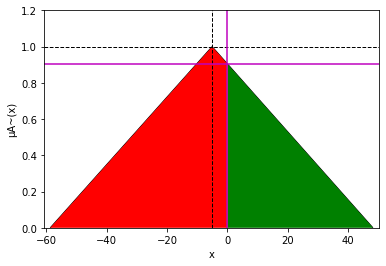

<Figure size 432x288 with 0 Axes>

[Point2D(0, 4519700000000000/5480199999999999)]


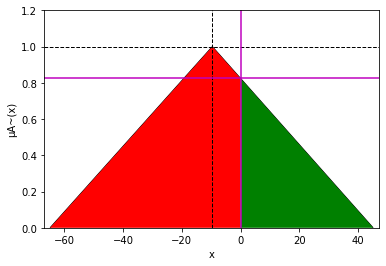

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7906/9103)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 4781800000000000/5023300000000001)]


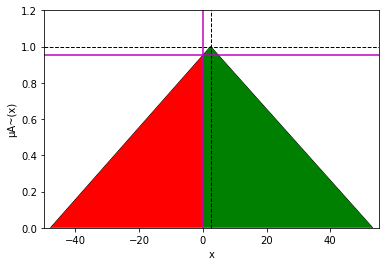

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5053700000000000/5411700000000001)]


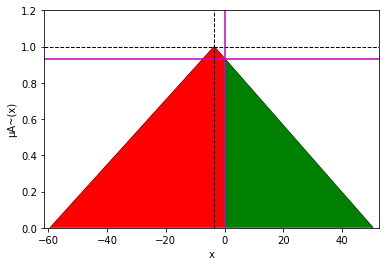

<Figure size 432x288 with 0 Axes>

[Point2D(0, 987999999999999/4177999999999999)]


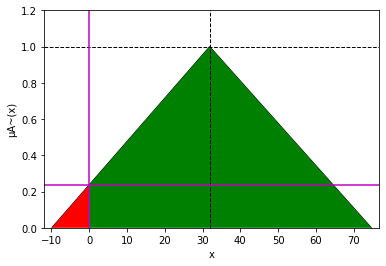

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2556650000000000/2796250000000001)]


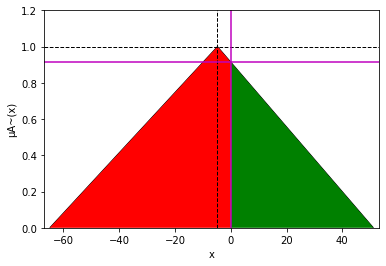

<Figure size 432x288 with 0 Axes>

[Point2D(0, 31185/50854)]


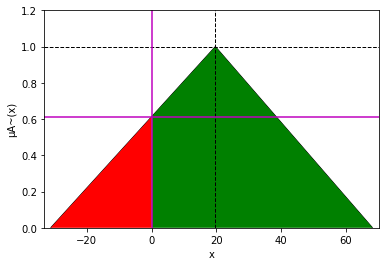

<Figure size 432x288 with 0 Axes>

[Point2D(0, 27134/47781)]


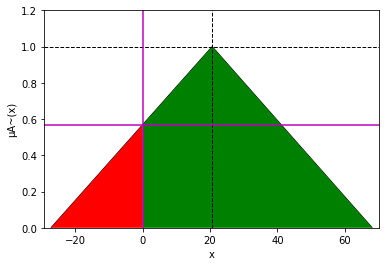

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2223250000000000/2634249999999999)]


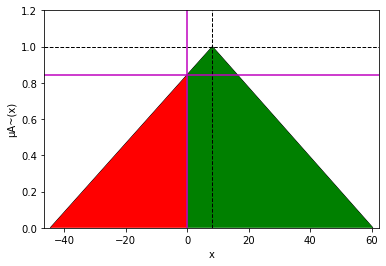

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

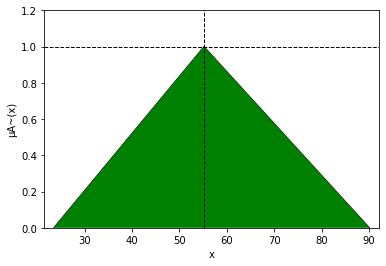

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

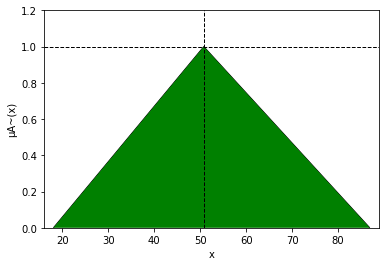

<Figure size 432x288 with 0 Axes>

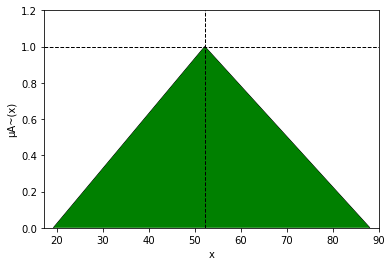

<Figure size 432x288 with 0 Axes>

[Point2D(0, 37348/41395)]


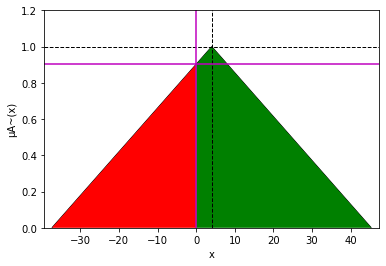

<Figure size 432x288 with 0 Axes>

[Point2D(0, 9952/15393)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 9233/16116)]


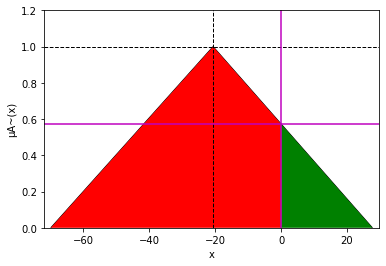

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6779/26711)]


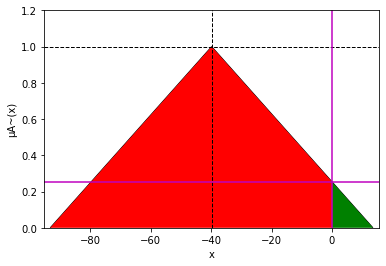

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26636/48035)]


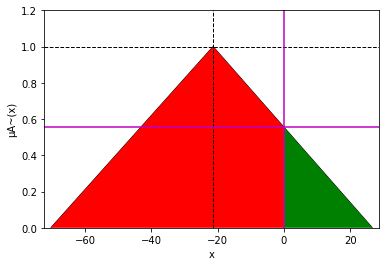

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5899/12381)]


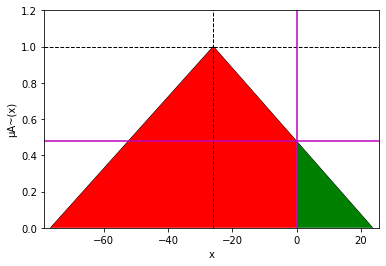

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5167/9868)]


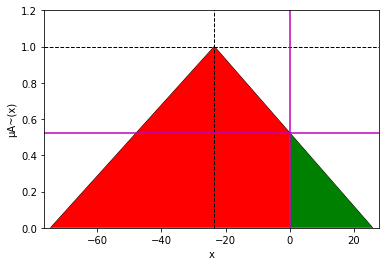

<Figure size 432x288 with 0 Axes>

[Point2D(0, 31663/45571)]


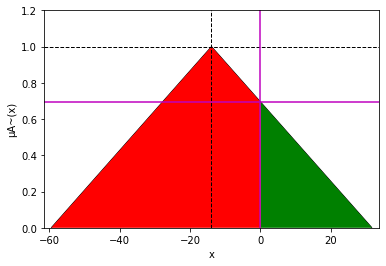

<Figure size 432x288 with 0 Axes>

[Point2D(0, 28936/48839)]


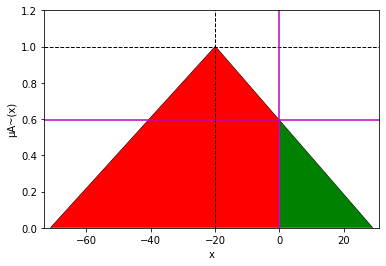

<Figure size 432x288 with 0 Axes>

[Point2D(0, 21484/37061)]


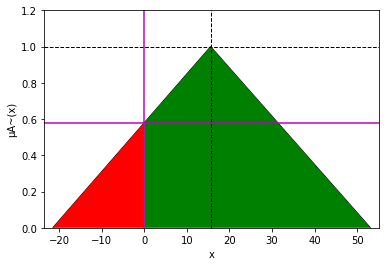

<Figure size 432x288 with 0 Axes>

[Point2D(0, 29532/50647)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 42789/46135)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 3873800000000000/4306200000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 12935/15636)]


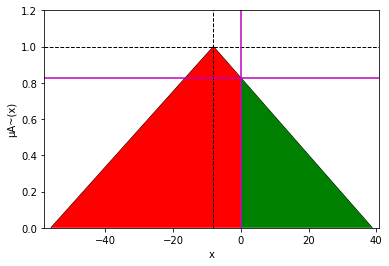

<Figure size 432x288 with 0 Axes>

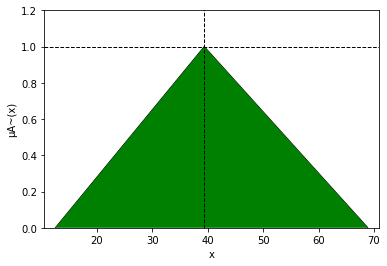

<Figure size 432x288 with 0 Axes>

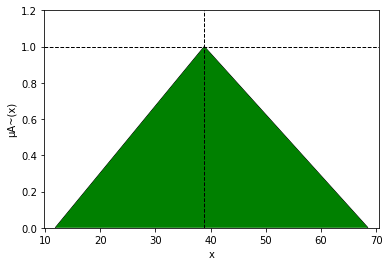

<Figure size 432x288 with 0 Axes>

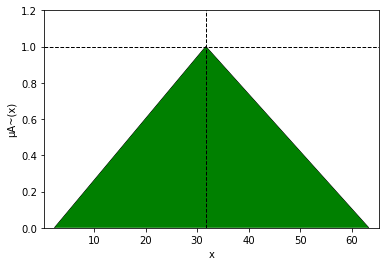

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

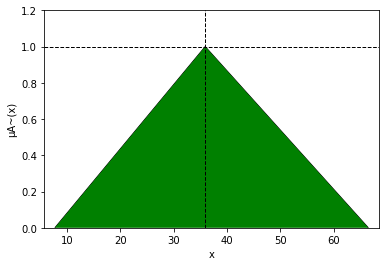

<Figure size 432x288 with 0 Axes>

[Point2D(0, 23587/48283)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 2465000000000000/2681300000000001)]


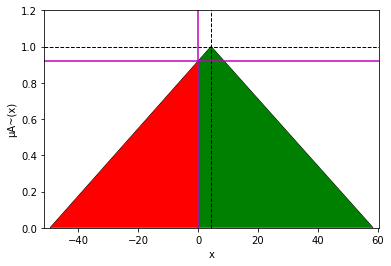

<Figure size 432x288 with 0 Axes>

[Point2D(0, 9233/16116)]


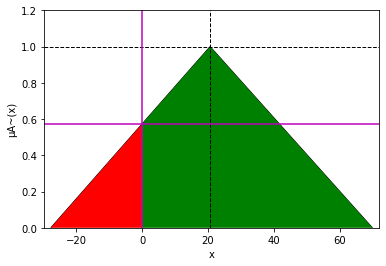

<Figure size 432x288 with 0 Axes>

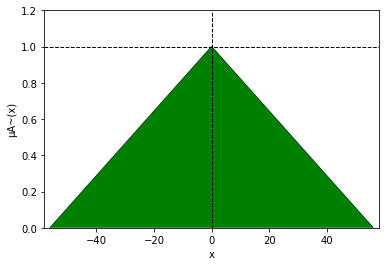

<Figure size 432x288 with 0 Axes>

[Point2D(0, 42002/61217)]


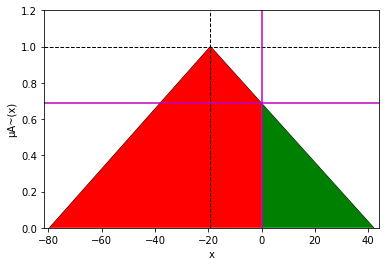

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1836/1861)]


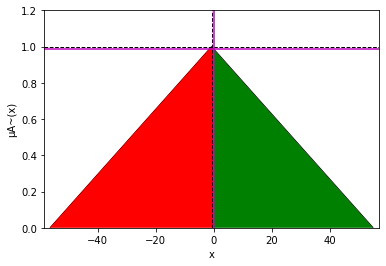

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5204000000000000/5731899999999997)]


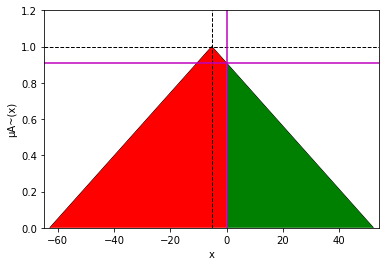

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2713950000000000/2856749999999999)]


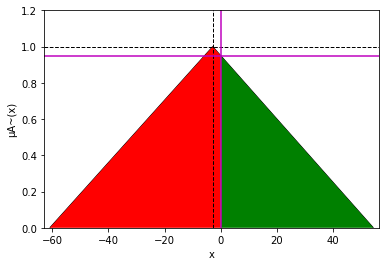

<Figure size 432x288 with 0 Axes>

[Point2D(0, 4566100000000000/5240200000000003)]


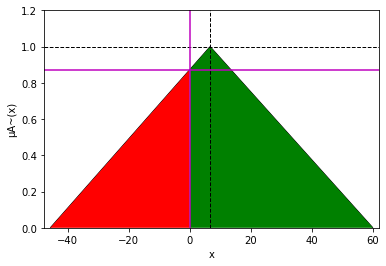

<Figure size 432x288 with 0 Axes>

[Point2D(0, 57287000000000000/58033000000000009)]


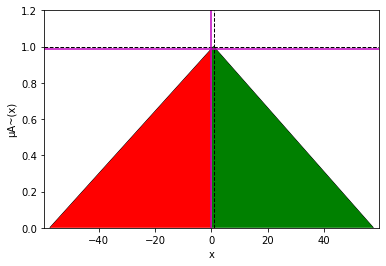

<Figure size 432x288 with 0 Axes>

[Point2D(0, 772299999999999/4394899999999999)]


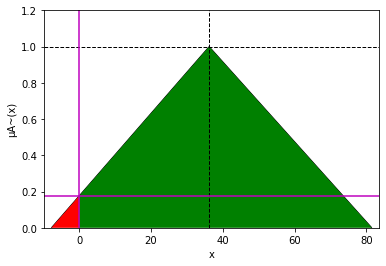

<Figure size 432x288 with 0 Axes>

[Point2D(0, 28988000000000000/29220999999999997)]


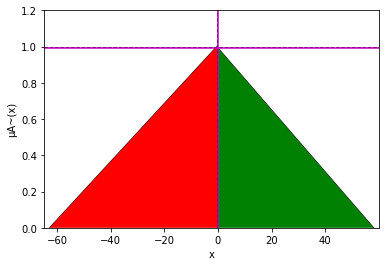

<Figure size 432x288 with 0 Axes>

[Point2D(0, 29028/53023)]


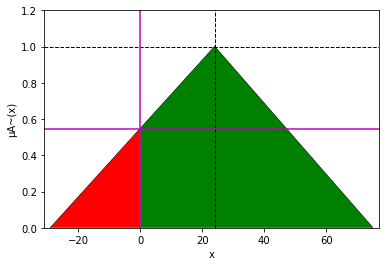

<Figure size 432x288 with 0 Axes>

[Point2D(0, 24977/49950)]


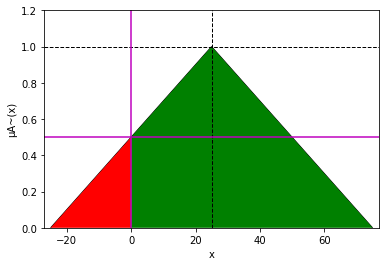

<Figure size 432x288 with 0 Axes>

[Point2D(0, 21154/27427)]


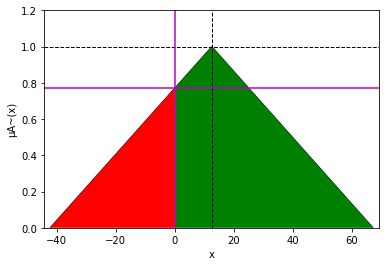

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

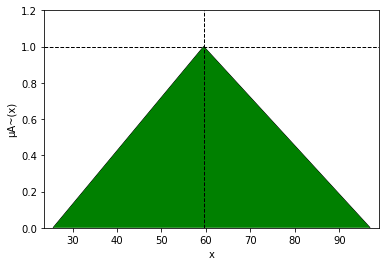

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

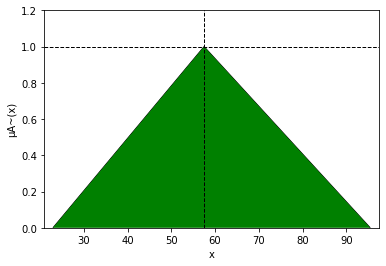

<Figure size 432x288 with 0 Axes>

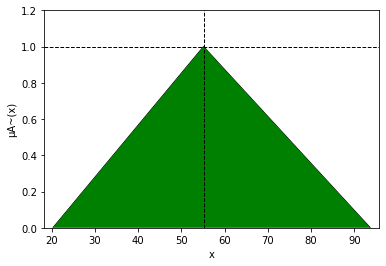

<Figure size 432x288 with 0 Axes>

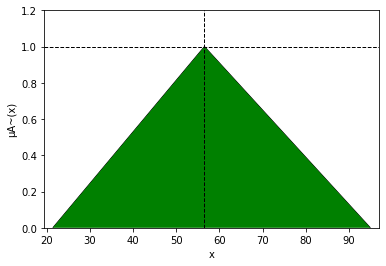

<Figure size 432x288 with 0 Axes>

[Point2D(0, 157433333333333/889283333333333)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 35159/58700)]


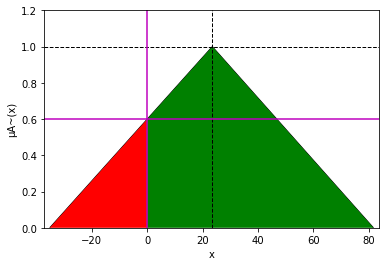

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6779/26711)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 42002/61217)]


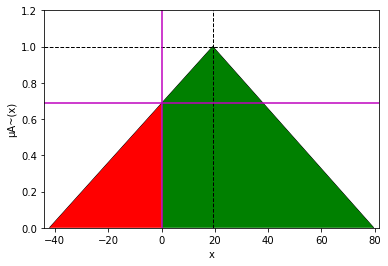

<Figure size 432x288 with 0 Axes>

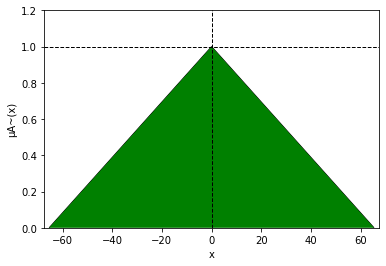

<Figure size 432x288 with 0 Axes>

[Point2D(0, 14141/20296)]


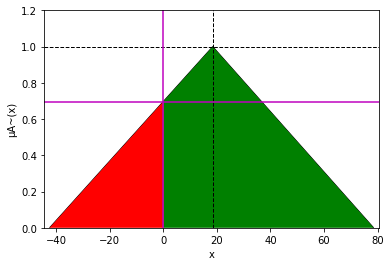

<Figure size 432x288 with 0 Axes>

[Point2D(0, 12153/15637)]


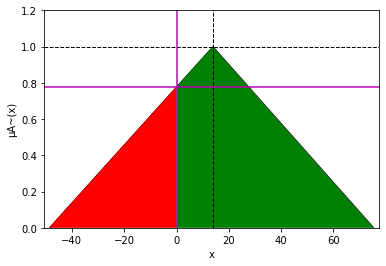

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6664/9001)]


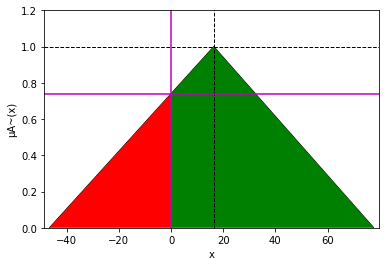

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7880/14369)]


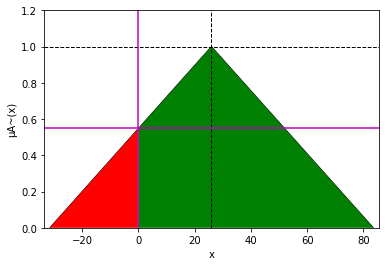

<Figure size 432x288 with 0 Axes>

[Point2D(0, 43146/63107)]


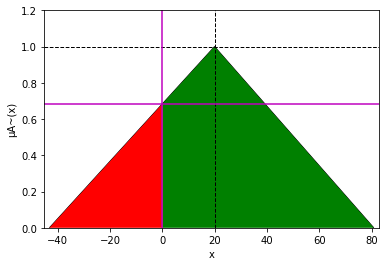

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 48614/67363)]


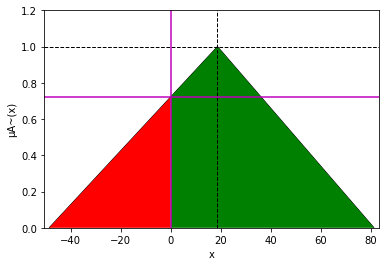

<Figure size 432x288 with 0 Axes>

[Point2D(0, 14887/58097)]


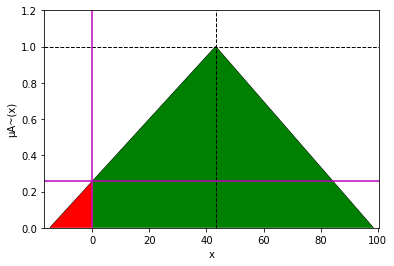

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2709/13756)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 9389/19976)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

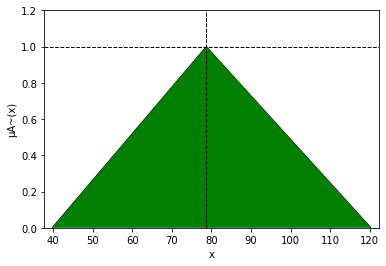

<Figure size 432x288 with 0 Axes>

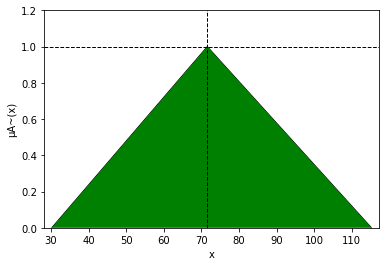

<Figure size 432x288 with 0 Axes>

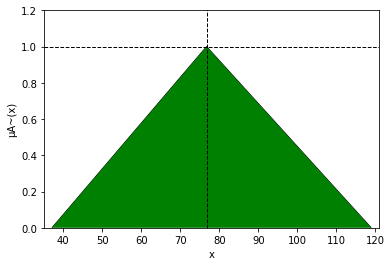

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

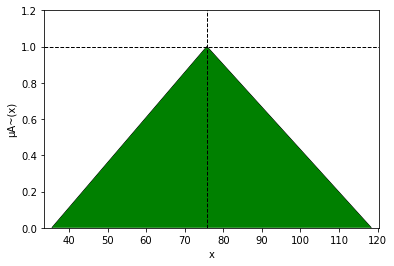

<Figure size 432x288 with 0 Axes>

[Point2D(0, 3754/7995)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 4823700000000000/5331299999999999)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 26636/48035)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 1836/1861)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 14141/20296)]


<Figure size 432x288 with 0 Axes>

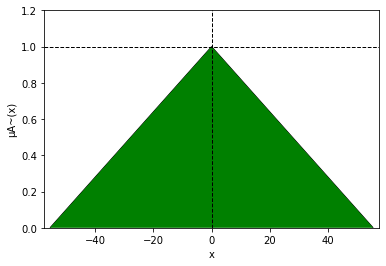

<Figure size 432x288 with 0 Axes>

[Point2D(0, 52461/56990)]


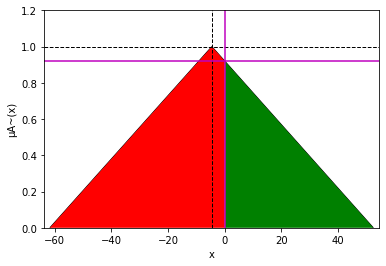

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5470000000000000/5680600000000001)]


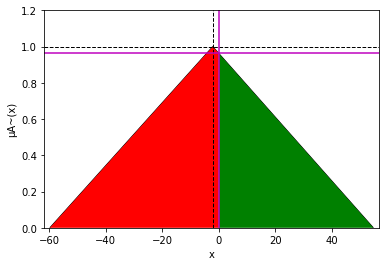

<Figure size 432x288 with 0 Axes>

[Point2D(0, 14866/17363)]


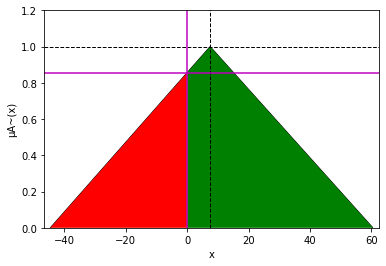

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2811200000000000/2885999999999999)]


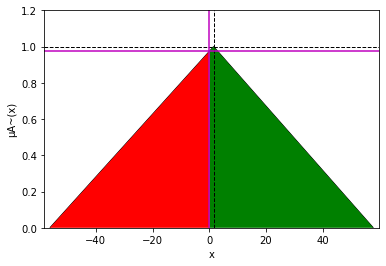

<Figure size 432x288 with 0 Axes>

[Point2D(0, 665999999999999/4363599999999999)]


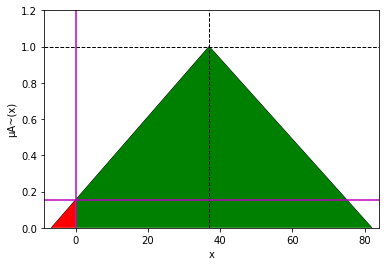

<Figure size 432x288 with 0 Axes>

[Point2D(0, 30846000000000000/30987999999999989)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 799/1506)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 23914/49637)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 41245/54541)]


<Figure size 432x288 with 0 Axes>

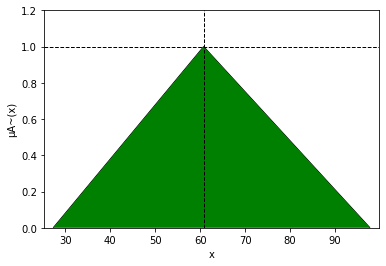

<Figure size 432x288 with 0 Axes>

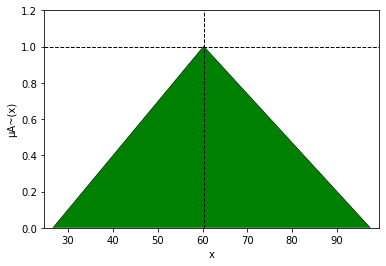

<Figure size 432x288 with 0 Axes>

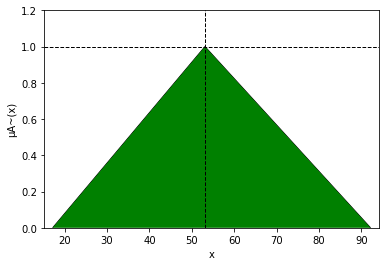

<Figure size 432x288 with 0 Axes>

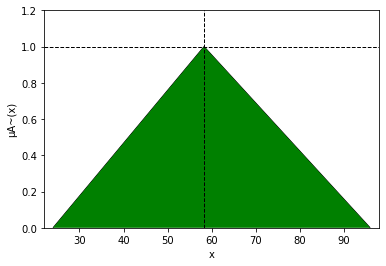

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 19484/49459)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 4519700000000000/5480199999999999)]


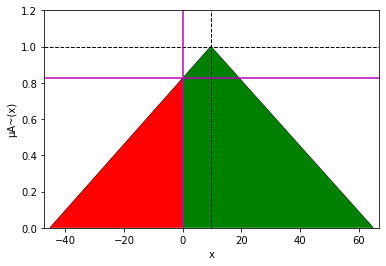

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5899/12381)]


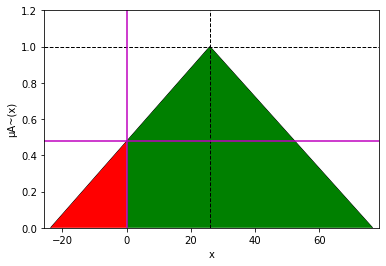

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5204000000000000/5731899999999997)]


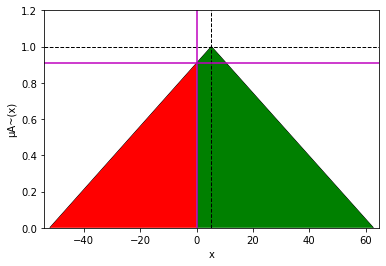

<Figure size 432x288 with 0 Axes>

[Point2D(0, 12153/15637)]


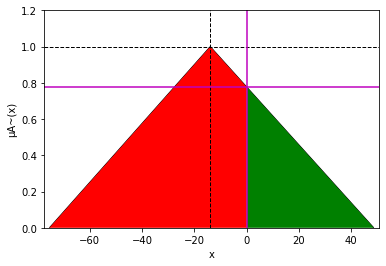

<Figure size 432x288 with 0 Axes>

[Point2D(0, 52461/56990)]


<Figure size 432x288 with 0 Axes>

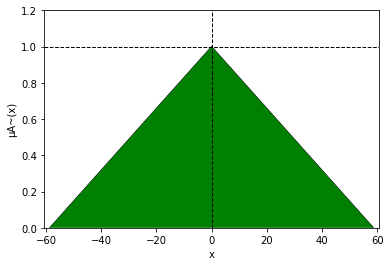

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5668600000000000/5910899999999999)]


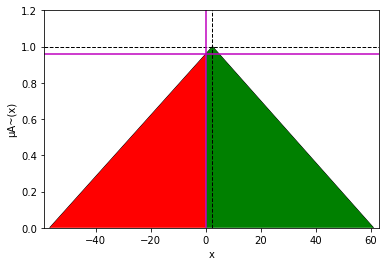

<Figure size 432x288 with 0 Axes>

[Point2D(0, 20779/26789)]


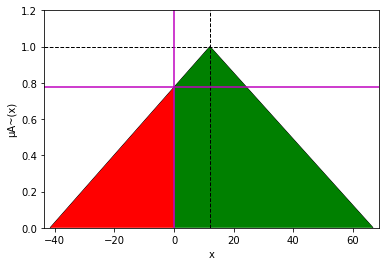

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2659200000000000/2960449999999999)]


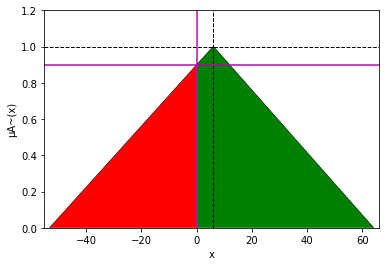

<Figure size 432x288 with 0 Axes>

[Point2D(0, 724/9025)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 5865200000000000/6346499999999997)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 24925/54199)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 3479/8521)]


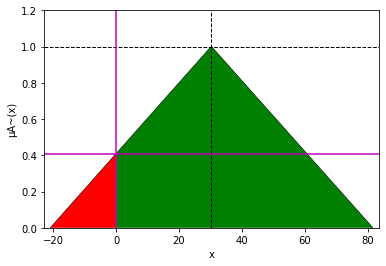

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7641/11206)]


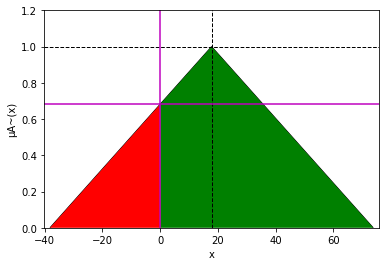

<Figure size 432x288 with 0 Axes>

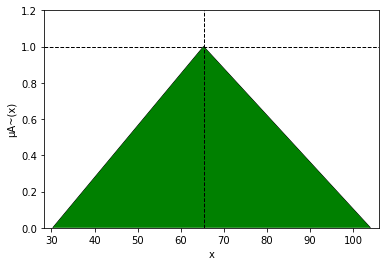

<Figure size 432x288 with 0 Axes>

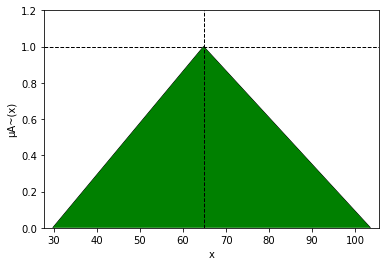

<Figure size 432x288 with 0 Axes>

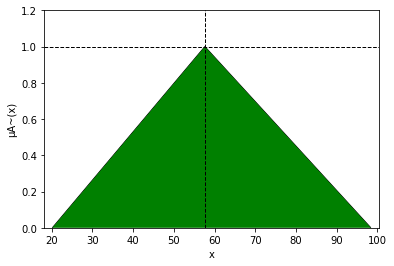

<Figure size 432x288 with 0 Axes>

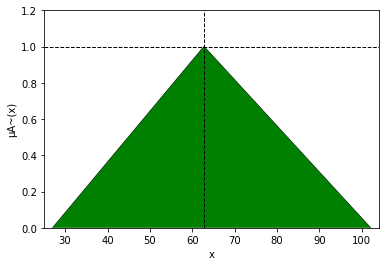

<Figure size 432x288 with 0 Axes>

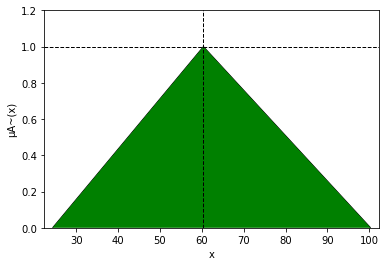

<Figure size 432x288 with 0 Axes>

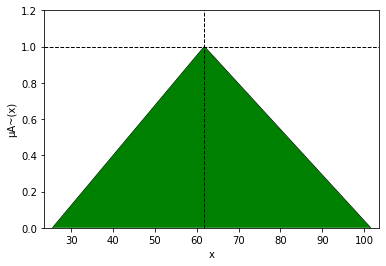

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7241/16425)]


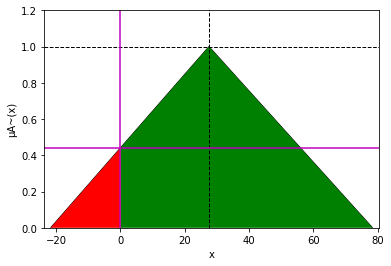

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7906/9103)]


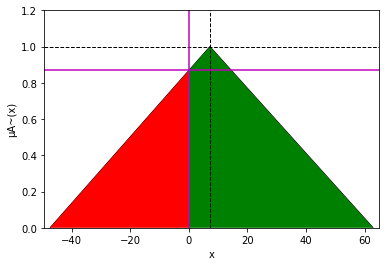

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5167/9868)]


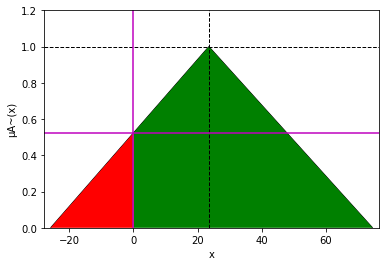

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2713950000000000/2856749999999999)]


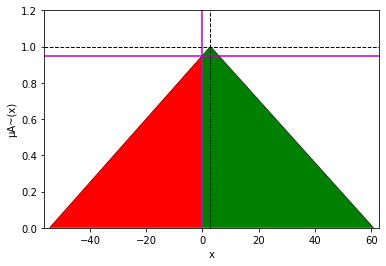

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6664/9001)]


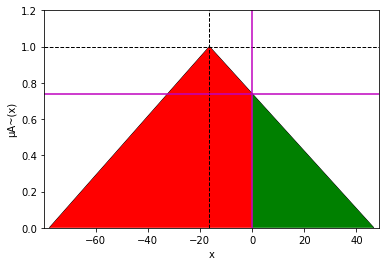

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5470000000000000/5680600000000001)]


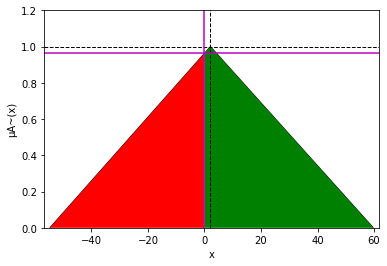

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5668600000000000/5910899999999999)]


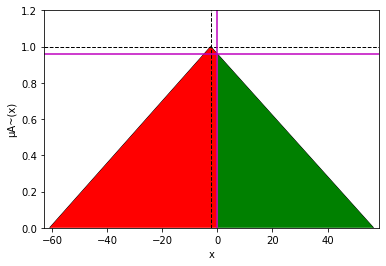

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 336900000000000/410723076923077)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 5542300000000000/5902499999999999)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 292949999999999/2247049999999999)]


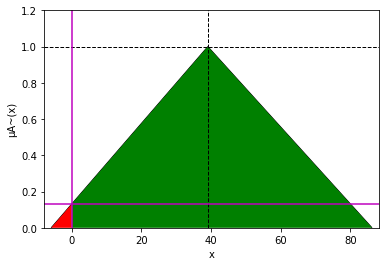

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6089100000000000/6328099999999999)]


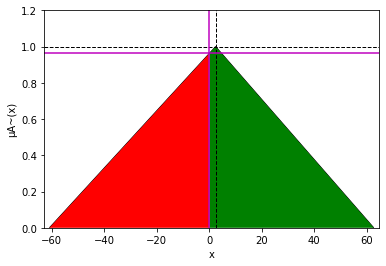

<Figure size 432x288 with 0 Axes>

[Point2D(0, 27164/54015)]


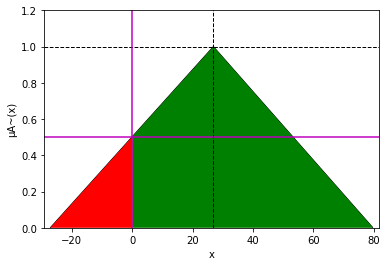

<Figure size 432x288 with 0 Axes>

[Point2D(0, 23113/50942)]


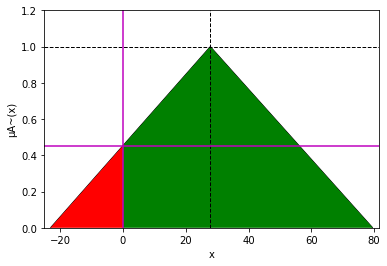

<Figure size 432x288 with 0 Axes>

[Point2D(0, 20222/27923)]


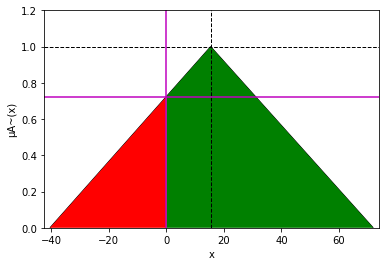

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

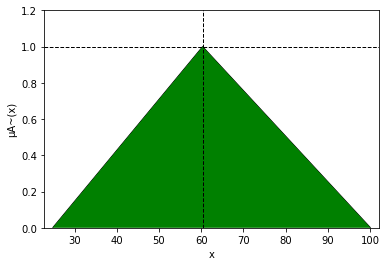

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 27551/45506)]


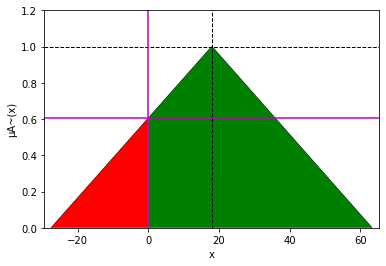

<Figure size 432x288 with 0 Axes>

[Point2D(0, 4781800000000000/5023300000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 31663/45571)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 4566100000000000/5240200000000003)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 7880/14369)]


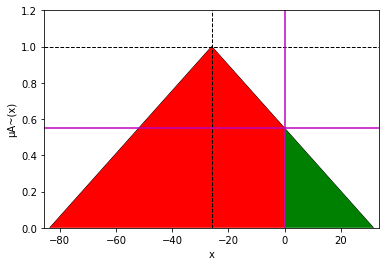

<Figure size 432x288 with 0 Axes>

[Point2D(0, 14866/17363)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 20779/26789)]


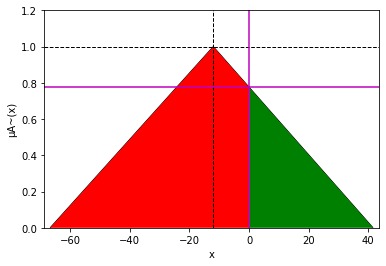

<Figure size 432x288 with 0 Axes>

[Point2D(0, 336900000000000/410723076923077)]


<Figure size 432x288 with 0 Axes>

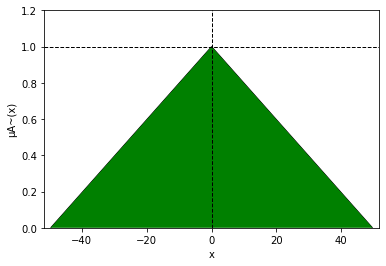

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2344900000000000/2644650000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 11687/41172)]


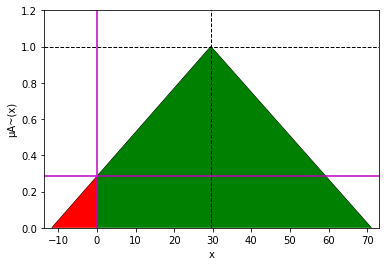

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2374700000000000/2735050000000001)]


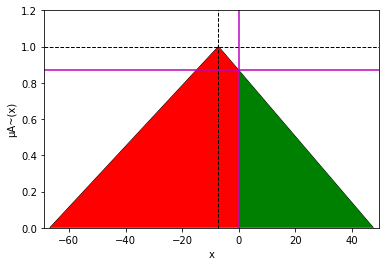

<Figure size 432x288 with 0 Axes>

[Point2D(0, 16496/25123)]


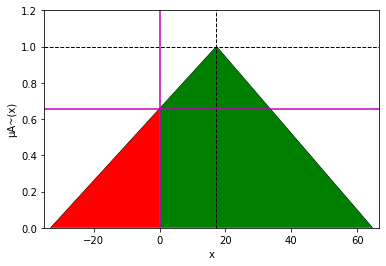

<Figure size 432x288 with 0 Axes>

[Point2D(0, 28941/47173)]


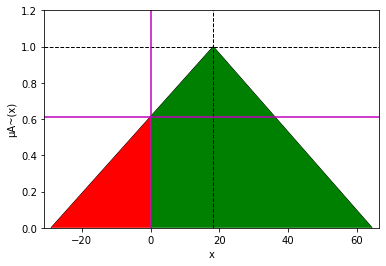

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2313600000000000/2603849999999999)]


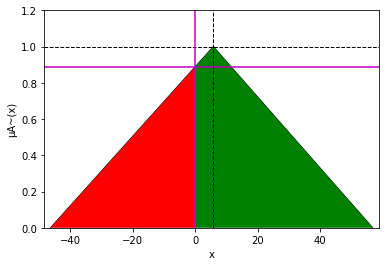

<Figure size 432x288 with 0 Axes>

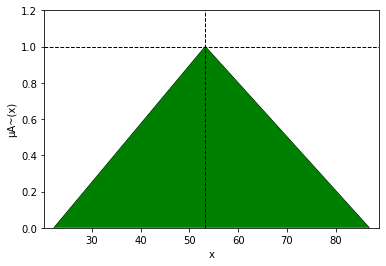

<Figure size 432x288 with 0 Axes>

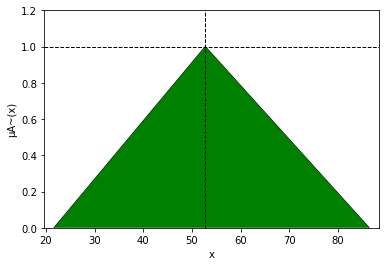

<Figure size 432x288 with 0 Axes>

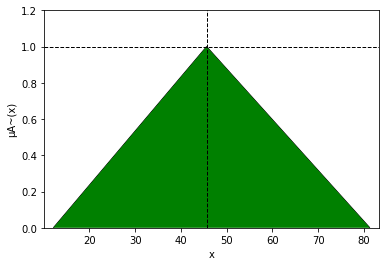

<Figure size 432x288 with 0 Axes>

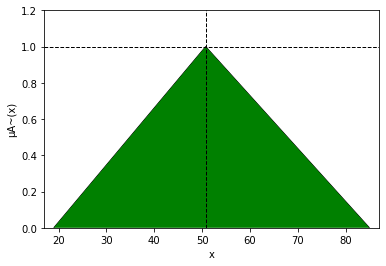

<Figure size 432x288 with 0 Axes>

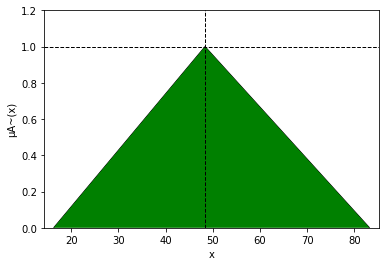

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 12412/24387)]


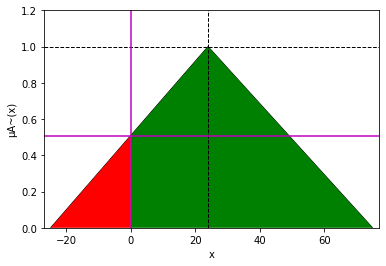

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5053700000000000/5411700000000001)]


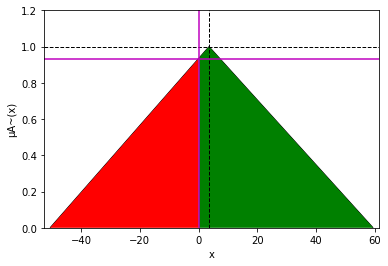

<Figure size 432x288 with 0 Axes>

[Point2D(0, 28936/48839)]


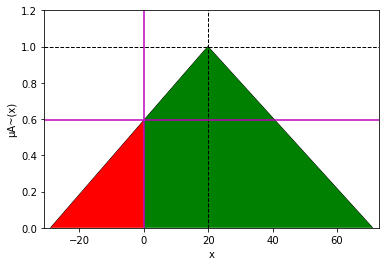

<Figure size 432x288 with 0 Axes>

[Point2D(0, 57287000000000000/58033000000000009)]


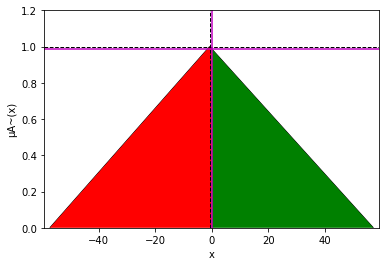

<Figure size 432x288 with 0 Axes>

[Point2D(0, 43146/63107)]


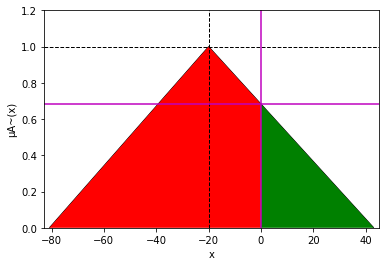

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2811200000000000/2885999999999999)]


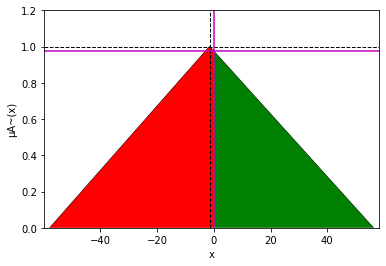

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2659200000000000/2960449999999999)]


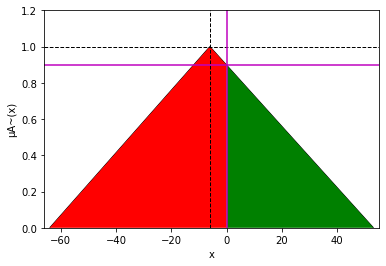

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5542300000000000/5902499999999999)]


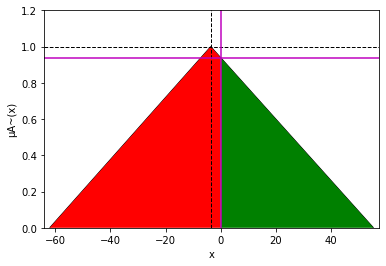

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2344900000000000/2644650000000001)]


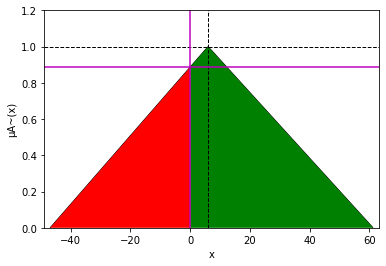

<Figure size 432x288 with 0 Axes>

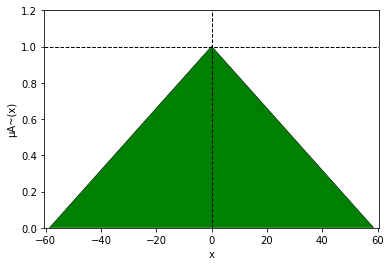

<Figure size 432x288 with 0 Axes>

[Point2D(0, 224/1111)]


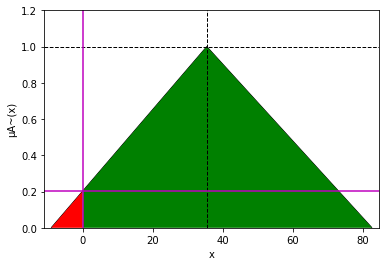

<Figure size 432x288 with 0 Axes>

[Point2D(0, 14780/15083)]


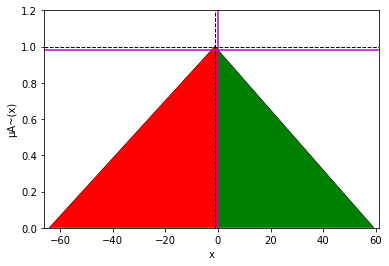

<Figure size 432x288 with 0 Axes>

[Point2D(0, 30265/53514)]


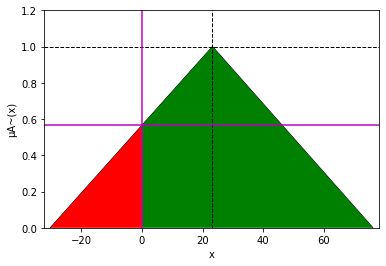

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26214/50441)]


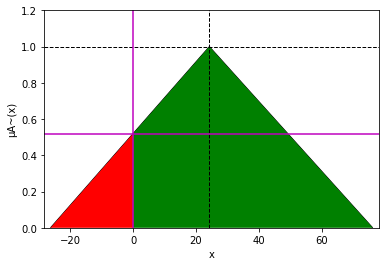

<Figure size 432x288 with 0 Axes>

[Point2D(0, 8709/11069)]


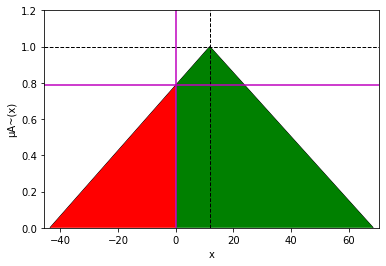

<Figure size 432x288 with 0 Axes>

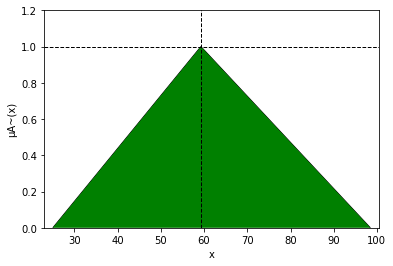

<Figure size 432x288 with 0 Axes>

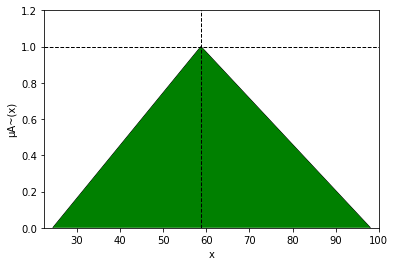

<Figure size 432x288 with 0 Axes>

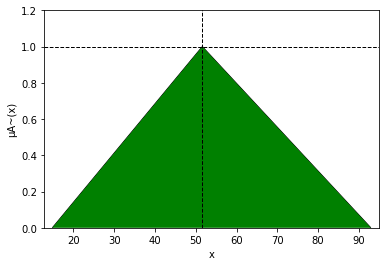

<Figure size 432x288 with 0 Axes>

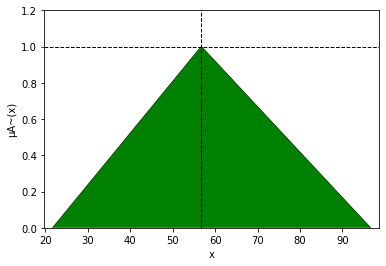

<Figure size 432x288 with 0 Axes>

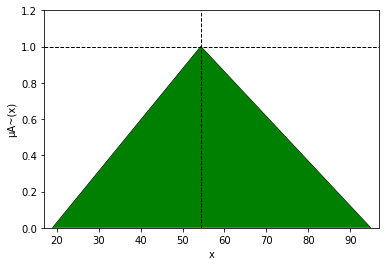

<Figure size 432x288 with 0 Axes>

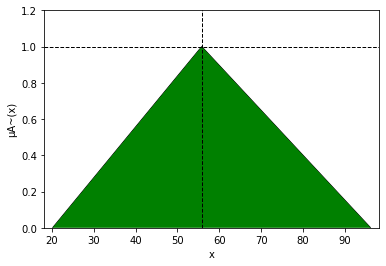

<Figure size 432x288 with 0 Axes>

[Point2D(0, 12689/18454)]


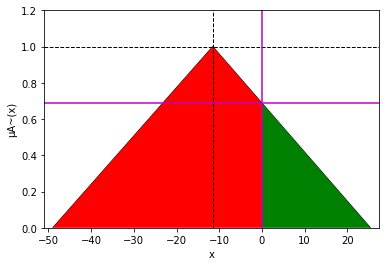

<Figure size 432x288 with 0 Axes>

[Point2D(0, 987999999999999/4177999999999999)]


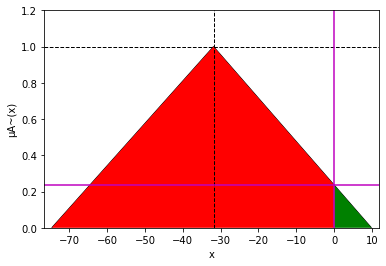

<Figure size 432x288 with 0 Axes>

[Point2D(0, 21484/37061)]


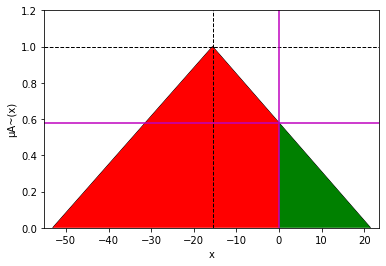

<Figure size 432x288 with 0 Axes>

[Point2D(0, 772299999999999/4394899999999999)]


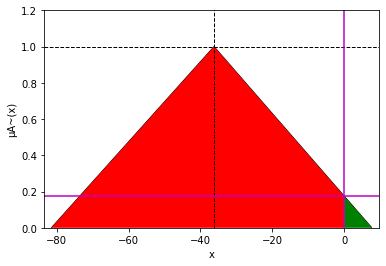

<Figure size 432x288 with 0 Axes>

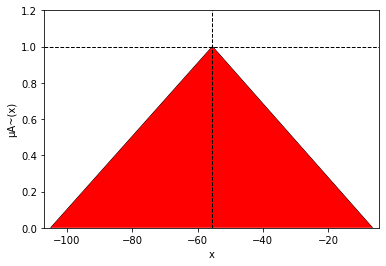

<Figure size 432x288 with 0 Axes>

[Point2D(0, 665999999999999/4363599999999999)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 724/9025)]


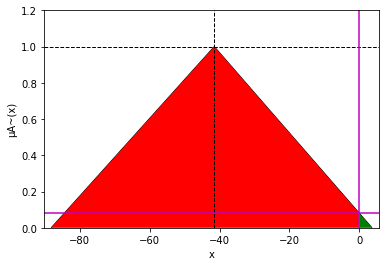

<Figure size 432x288 with 0 Axes>

[Point2D(0, 292949999999999/2247049999999999)]


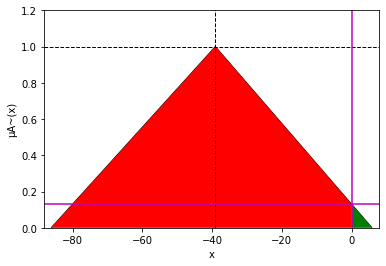

<Figure size 432x288 with 0 Axes>

[Point2D(0, 11687/41172)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 224/1111)]


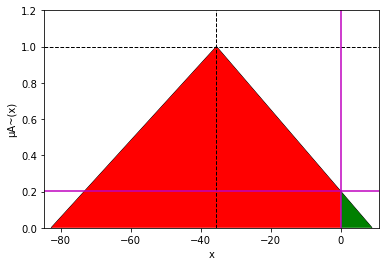

<Figure size 432x288 with 0 Axes>

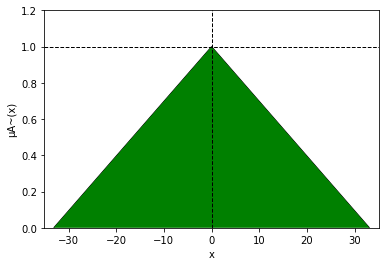

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2389/11562)]


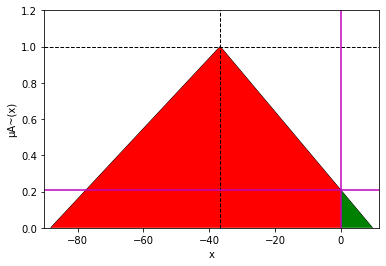

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26623/38854)]


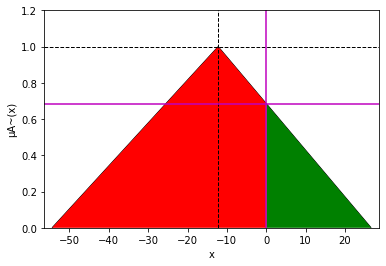

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26516/37769)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 18829/42509)]


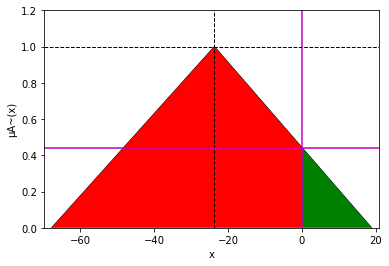

<Figure size 432x288 with 0 Axes>

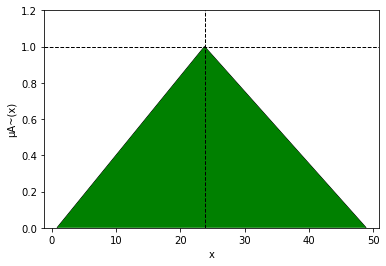

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 931000000000001/2543700000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 2437/23708)]


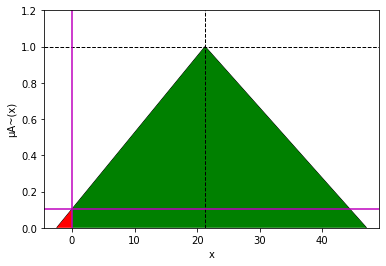

<Figure size 432x288 with 0 Axes>

[Point2D(0, 513500000000001/2401500000000001)]


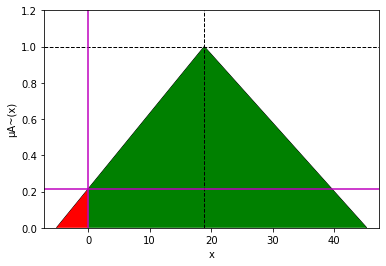

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1969/12125)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 12710/25291)]


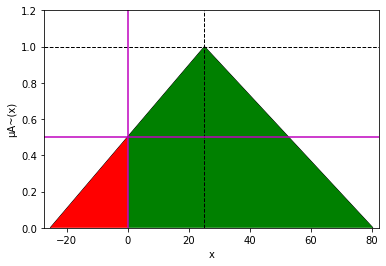

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2556650000000000/2796250000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 29532/50647)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 28988000000000000/29220999999999997)]


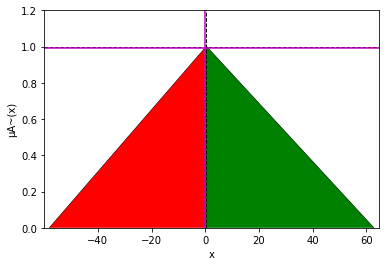

<Figure size 432x288 with 0 Axes>

[Point2D(0, 48614/67363)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 30846000000000000/30987999999999989)]


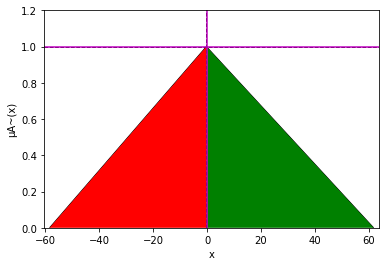

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5865200000000000/6346499999999997)]


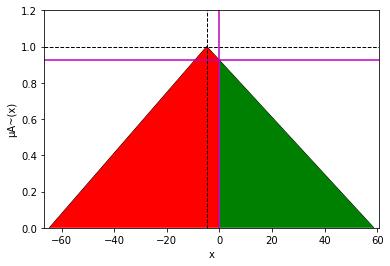

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6089100000000000/6328099999999999)]


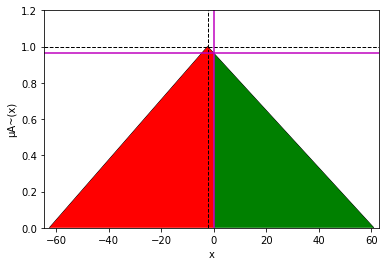

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2374700000000000/2735050000000001)]


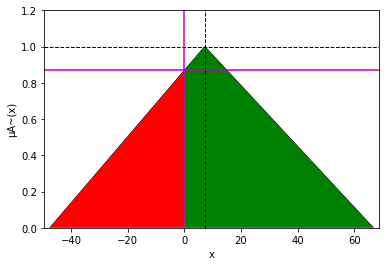

<Figure size 432x288 with 0 Axes>

[Point2D(0, 14780/15083)]


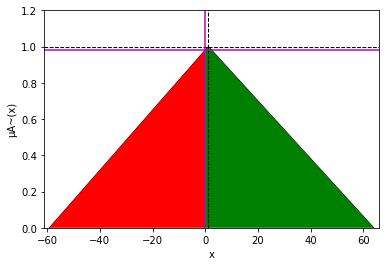

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2389/11562)]


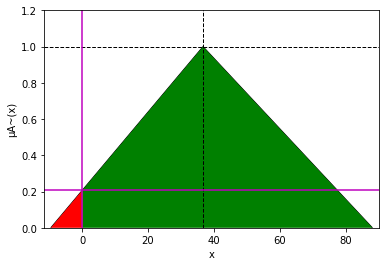

<Figure size 432x288 with 0 Axes>

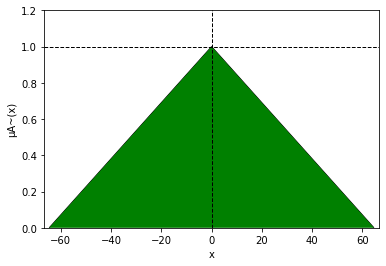

<Figure size 432x288 with 0 Axes>

[Point2D(0, 30861/55322)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 26810/52249)]


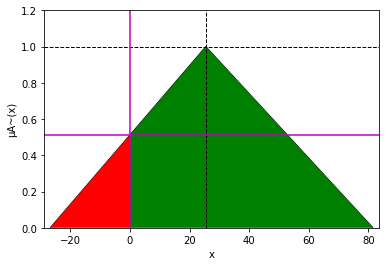

<Figure size 432x288 with 0 Axes>

[Point2D(0, 44141/57153)]


<Figure size 432x288 with 0 Axes>

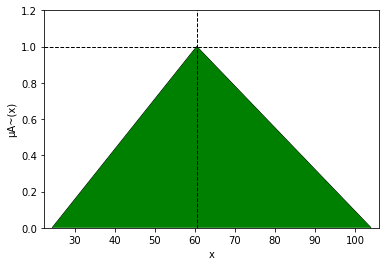

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

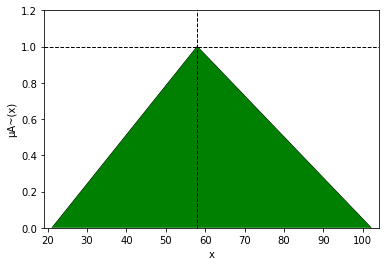

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 42487000000000000/43188000000000001)]


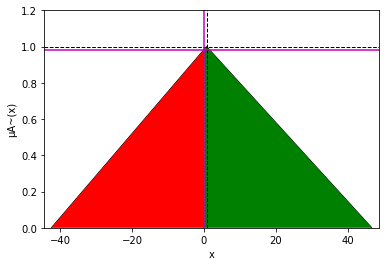

<Figure size 432x288 with 0 Axes>

[Point2D(0, 31185/50854)]


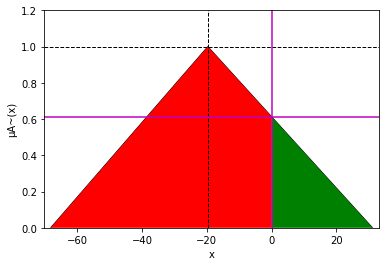

<Figure size 432x288 with 0 Axes>

[Point2D(0, 42789/46135)]


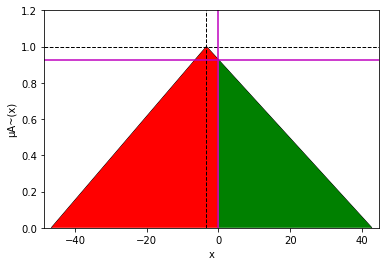

<Figure size 432x288 with 0 Axes>

[Point2D(0, 29028/53023)]


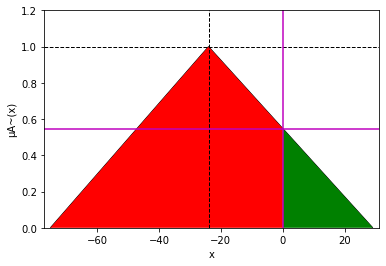

<Figure size 432x288 with 0 Axes>

[Point2D(0, 14887/58097)]


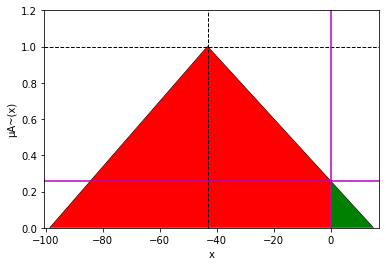

<Figure size 432x288 with 0 Axes>

[Point2D(0, 799/1506)]


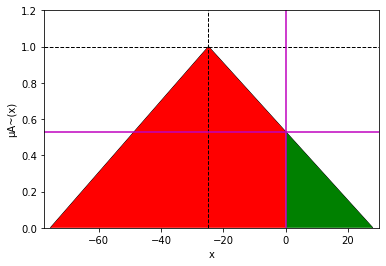

<Figure size 432x288 with 0 Axes>

[Point2D(0, 24925/54199)]


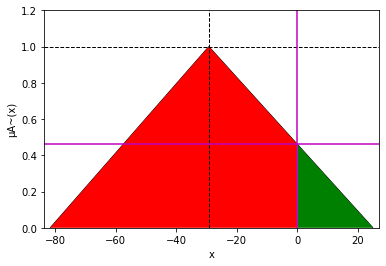

<Figure size 432x288 with 0 Axes>

[Point2D(0, 27164/54015)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 16496/25123)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 30265/53514)]


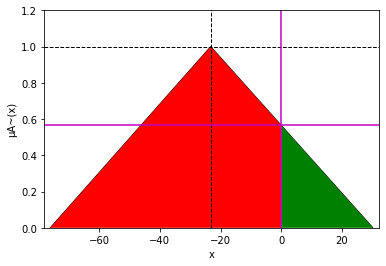

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26623/38854)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 30861/55322)]


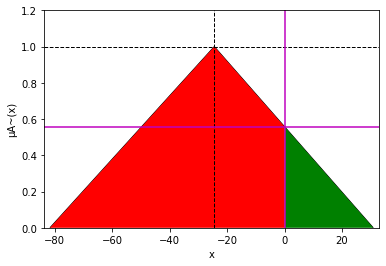

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 43877000000000000/44855000000000009)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 40134/51583)]


<Figure size 432x288 with 0 Axes>

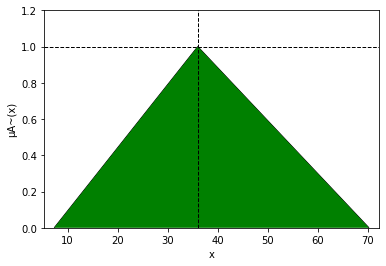

<Figure size 432x288 with 0 Axes>

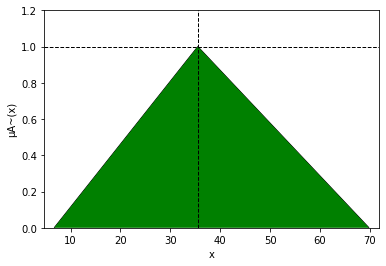

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1409/15588)]


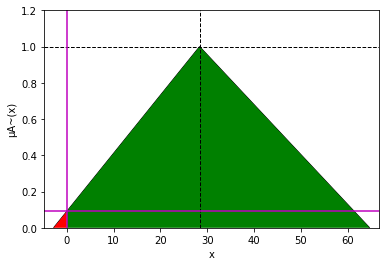

<Figure size 432x288 with 0 Axes>

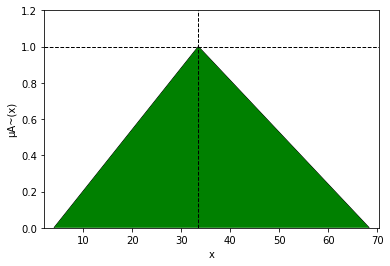

<Figure size 432x288 with 0 Axes>

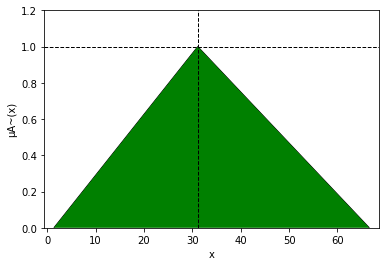

<Figure size 432x288 with 0 Axes>

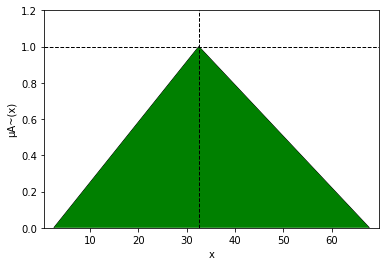

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5329000000000000/5363625000000001)]


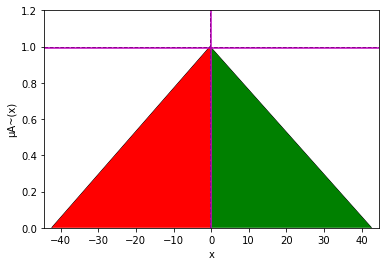

<Figure size 432x288 with 0 Axes>

[Point2D(0, 27134/47781)]


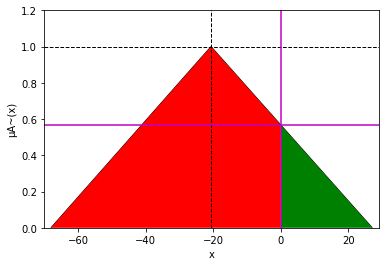

<Figure size 432x288 with 0 Axes>

[Point2D(0, 3873800000000000/4306200000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 24977/49950)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 2709/13756)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 23914/49637)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 3479/8521)]


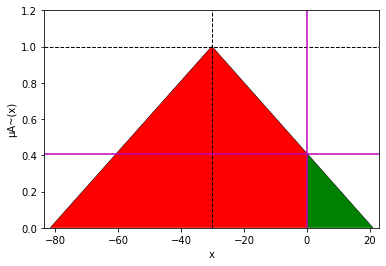

<Figure size 432x288 with 0 Axes>

[Point2D(0, 23113/50942)]


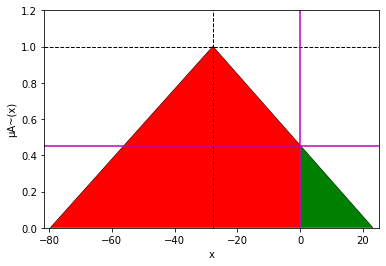

<Figure size 432x288 with 0 Axes>

[Point2D(0, 28941/47173)]


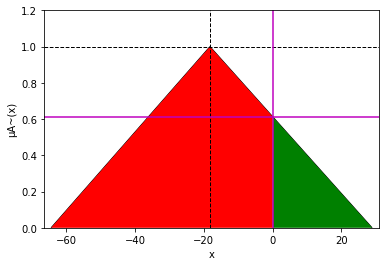

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26214/50441)]


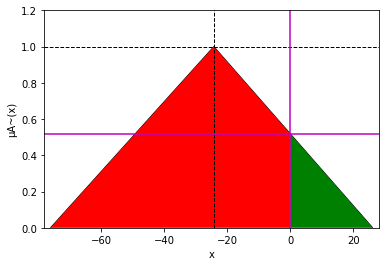

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26516/37769)]


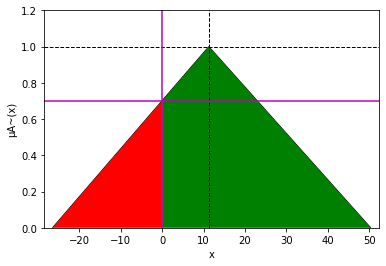

<Figure size 432x288 with 0 Axes>

[Point2D(0, 26810/52249)]


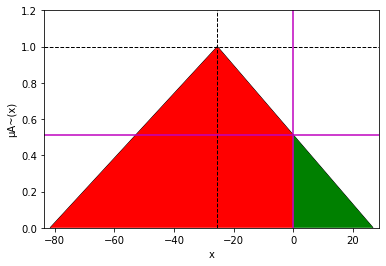

<Figure size 432x288 with 0 Axes>

[Point2D(0, 43877000000000000/44855000000000009)]


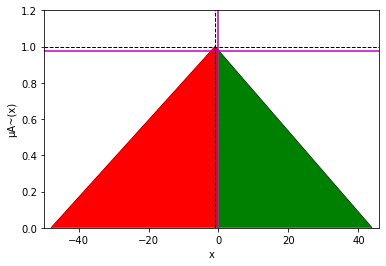

<Figure size 432x288 with 0 Axes>

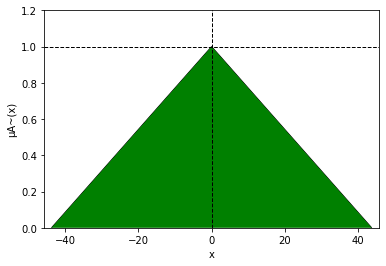

<Figure size 432x288 with 0 Axes>

[Point2D(0, 36083/48510)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

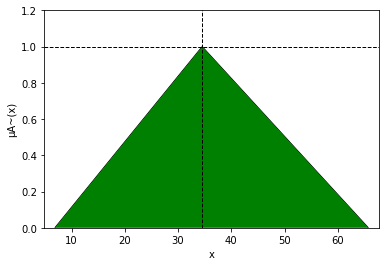

<Figure size 432x288 with 0 Axes>

[Point2D(0, 271100000000001/3009100000000001)]


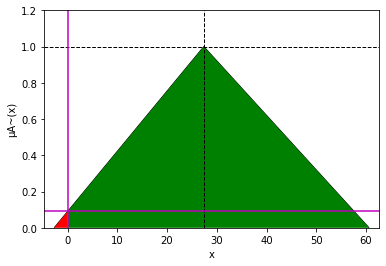

<Figure size 432x288 with 0 Axes>

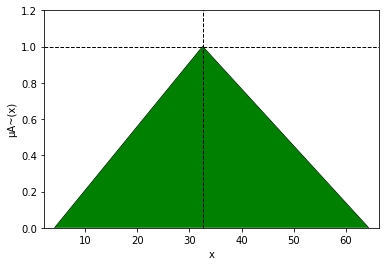

<Figure size 432x288 with 0 Axes>

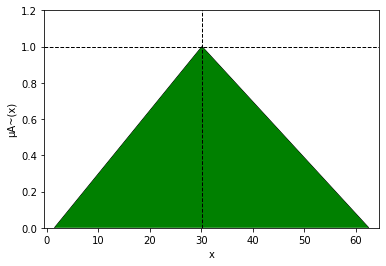

<Figure size 432x288 with 0 Axes>

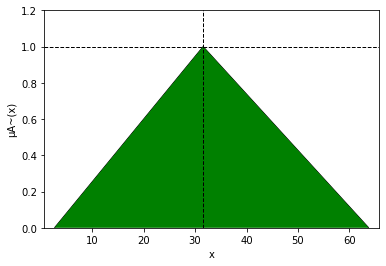

<Figure size 432x288 with 0 Axes>

[Point2D(0, 34693/46843)]


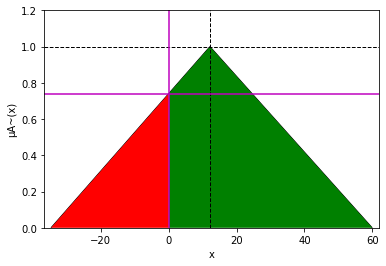

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2223250000000000/2634249999999999)]


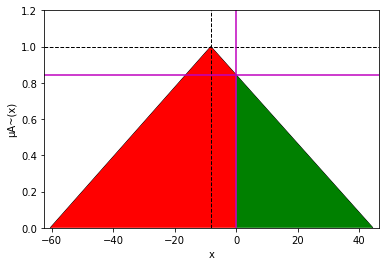

<Figure size 432x288 with 0 Axes>

[Point2D(0, 12935/15636)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 21154/27427)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 9389/19976)]


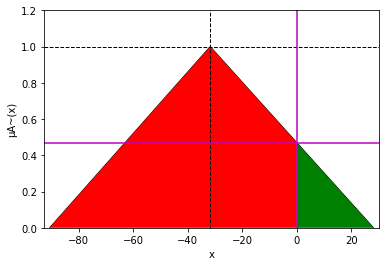

<Figure size 432x288 with 0 Axes>

[Point2D(0, 41245/54541)]


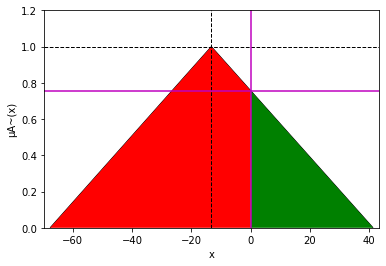

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7641/11206)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 20222/27923)]


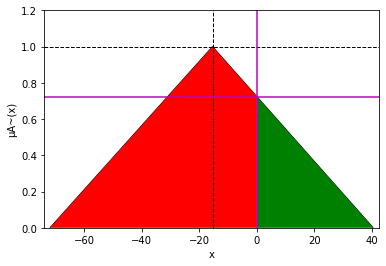

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2313600000000000/2603849999999999)]


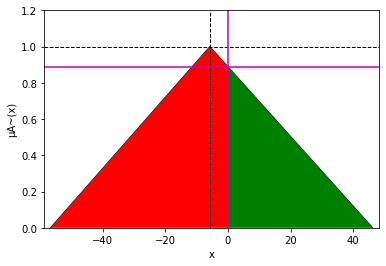

<Figure size 432x288 with 0 Axes>

[Point2D(0, 8709/11069)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 18829/42509)]


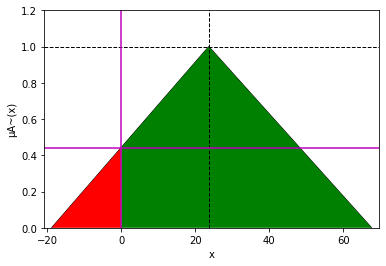

<Figure size 432x288 with 0 Axes>

[Point2D(0, 44141/57153)]


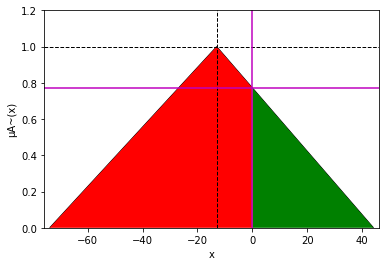

<Figure size 432x288 with 0 Axes>

[Point2D(0, 40134/51583)]


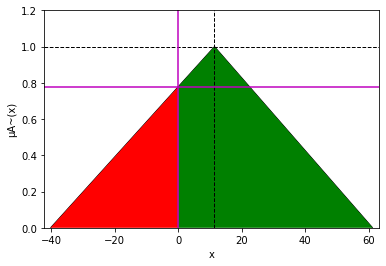

<Figure size 432x288 with 0 Axes>

[Point2D(0, 36083/48510)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

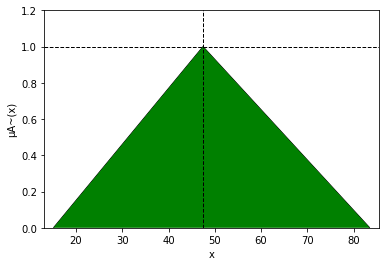

<Figure size 432x288 with 0 Axes>

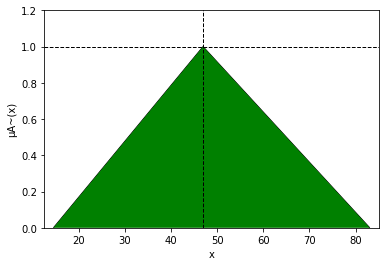

<Figure size 432x288 with 0 Axes>

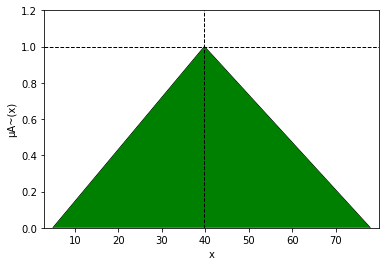

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

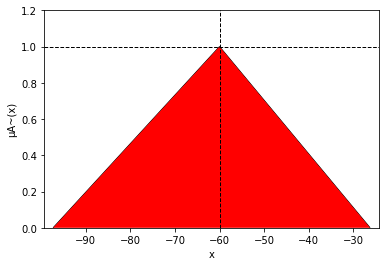

<Figure size 432x288 with 0 Axes>

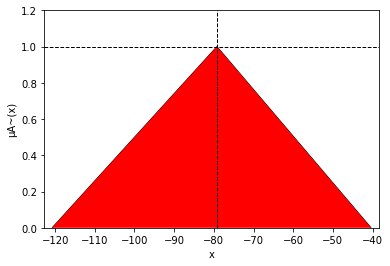

<Figure size 432x288 with 0 Axes>

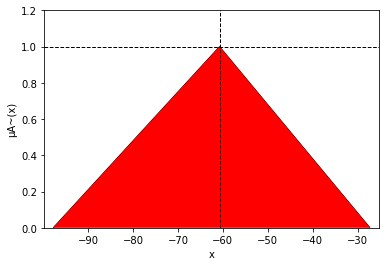

<Figure size 432x288 with 0 Axes>

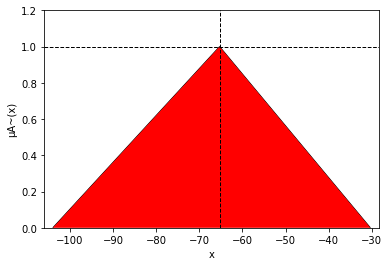

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

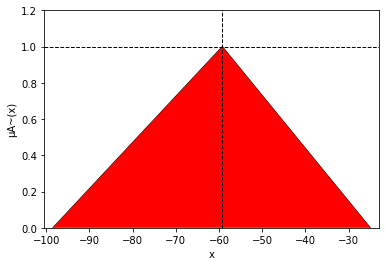

<Figure size 432x288 with 0 Axes>

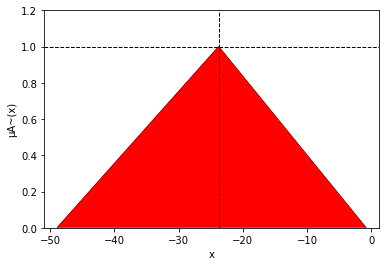

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

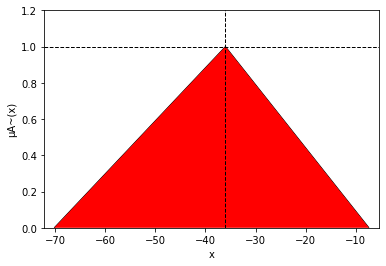

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

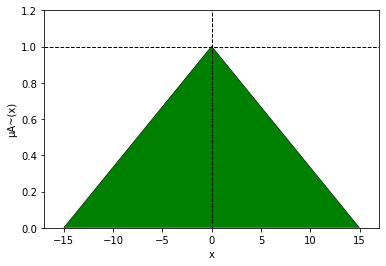

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7279500000000000/7532999999999999)]


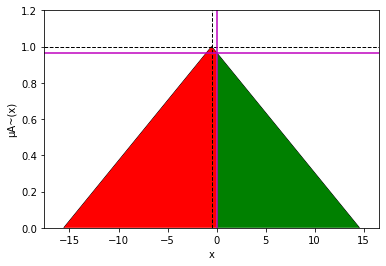

<Figure size 432x288 with 0 Axes>

[Point2D(0, 9402/17053)]


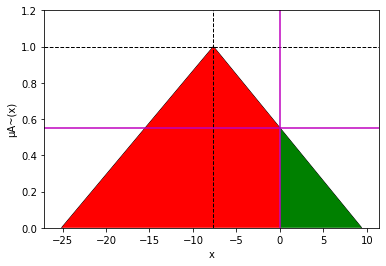

<Figure size 432x288 with 0 Axes>

[Point2D(0, 13107/15614)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 5666/8115)]


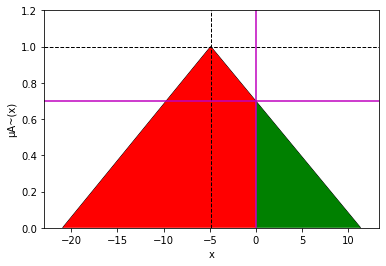

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6280/8013)]


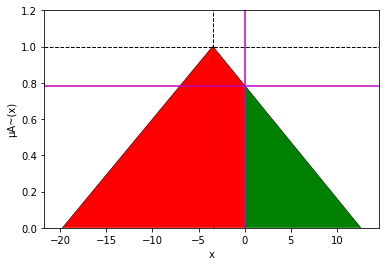

<Figure size 432x288 with 0 Axes>

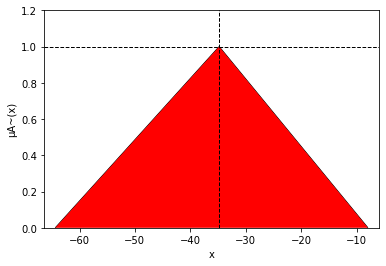

<Figure size 432x288 with 0 Axes>

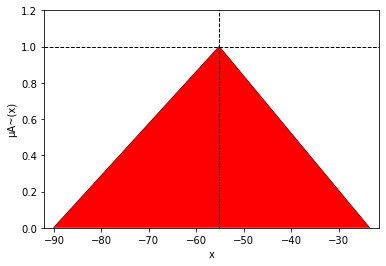

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

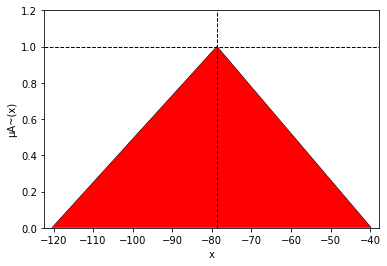

<Figure size 432x288 with 0 Axes>

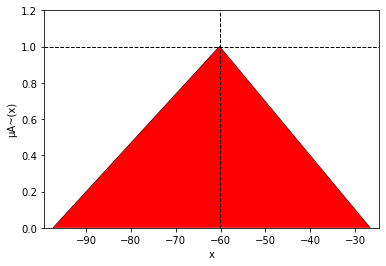

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

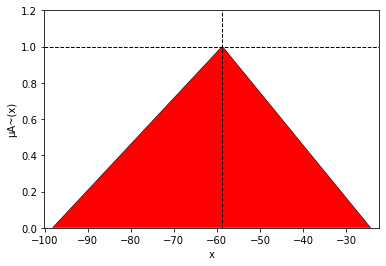

<Figure size 432x288 with 0 Axes>

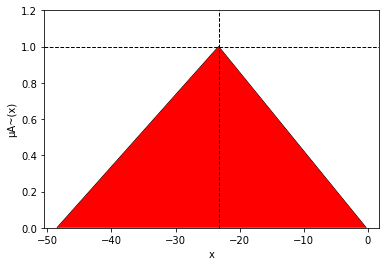

<Figure size 432x288 with 0 Axes>

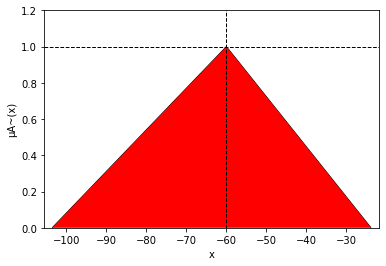

<Figure size 432x288 with 0 Axes>

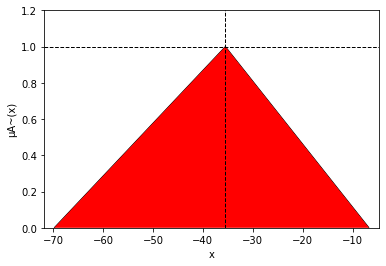

<Figure size 432x288 with 0 Axes>

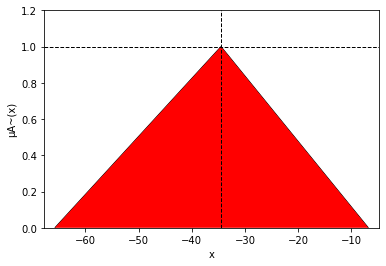

<Figure size 432x288 with 0 Axes>

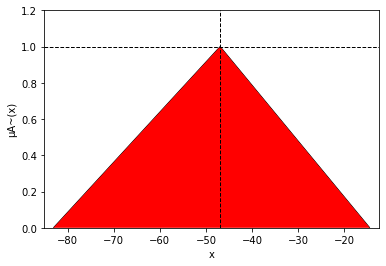

<Figure size 432x288 with 0 Axes>

[Point2D(0, 7279500000000000/7532999999999999)]


<Figure size 432x288 with 0 Axes>

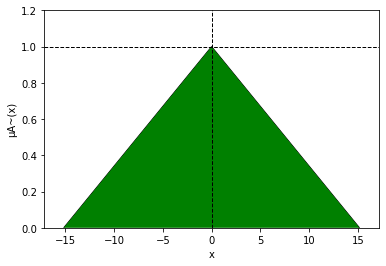

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1000900000000000/1715300000000001)]


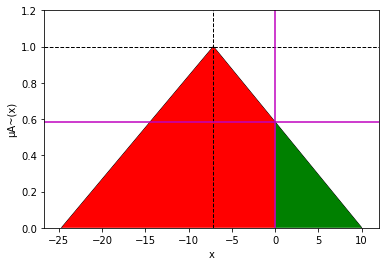

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6857/7857)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 1193900000000000/1633000000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 1197/1466)]


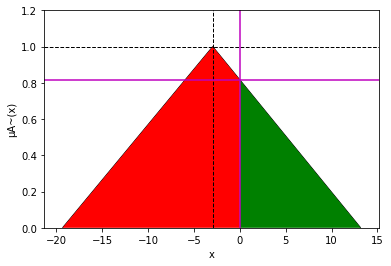

<Figure size 432x288 with 0 Axes>

[Point2D(0, 157300000000001/2923000000000001)]


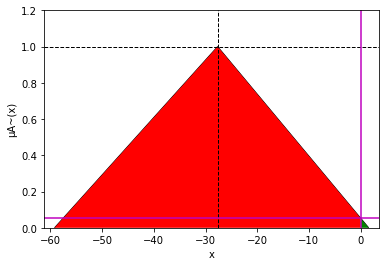

<Figure size 432x288 with 0 Axes>

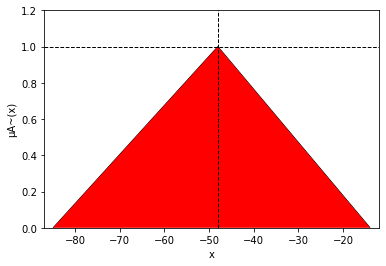

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

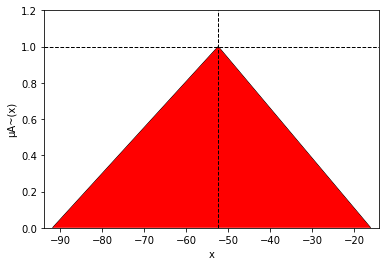

<Figure size 432x288 with 0 Axes>

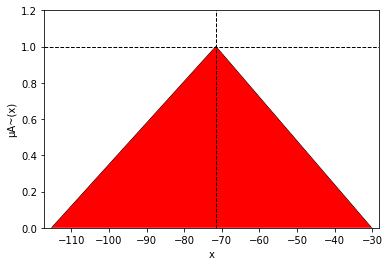

<Figure size 432x288 with 0 Axes>

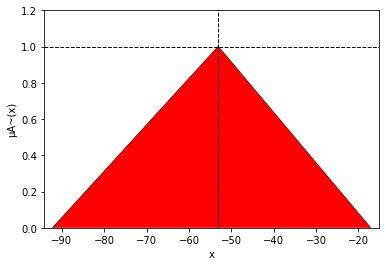

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 931000000000001/2543700000000001)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1409/15588)]


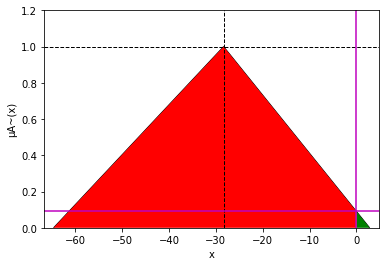

<Figure size 432x288 with 0 Axes>

[Point2D(0, 271100000000001/3009100000000001)]


<Figure size 432x288 with 0 Axes>

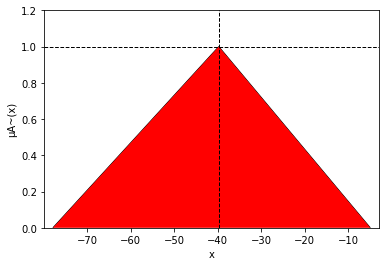

<Figure size 432x288 with 0 Axes>

[Point2D(0, 9402/17053)]


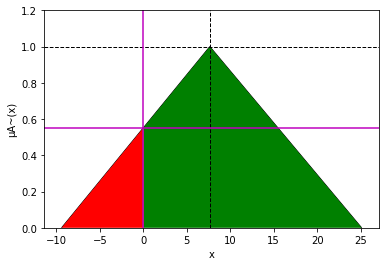

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1000900000000000/1715300000000001)]


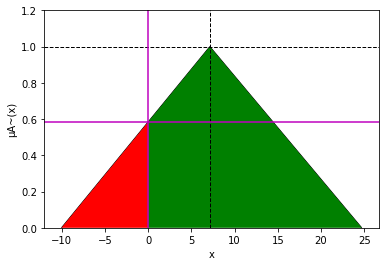

<Figure size 432x288 with 0 Axes>

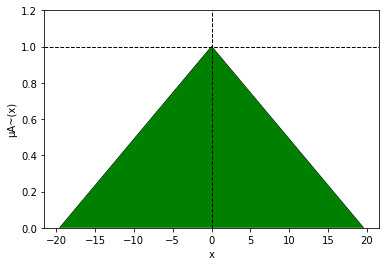

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1267100000000000/1781500000000001)]


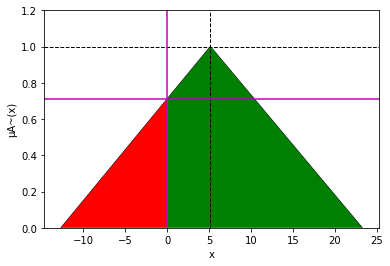

<Figure size 432x288 with 0 Axes>

[Point2D(0, 15369/18122)]


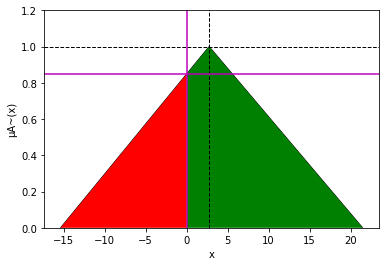

<Figure size 432x288 with 0 Axes>

[Point2D(0, 4724/6119)]


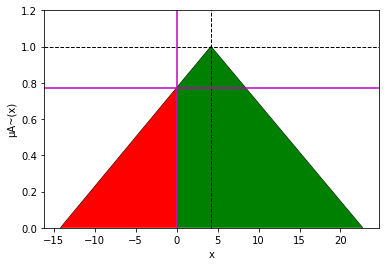

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

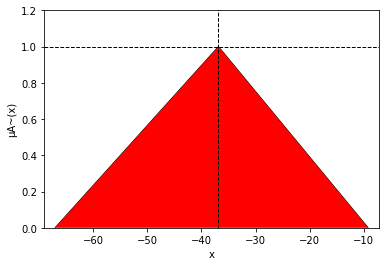

<Figure size 432x288 with 0 Axes>

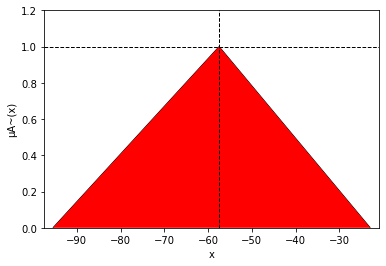

<Figure size 432x288 with 0 Axes>

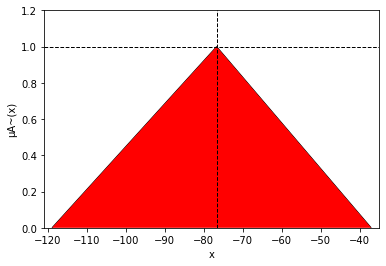

<Figure size 432x288 with 0 Axes>

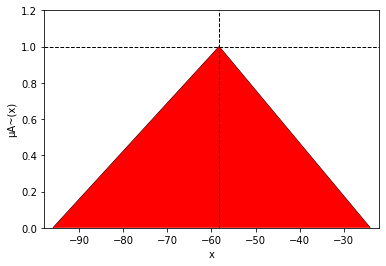

<Figure size 432x288 with 0 Axes>

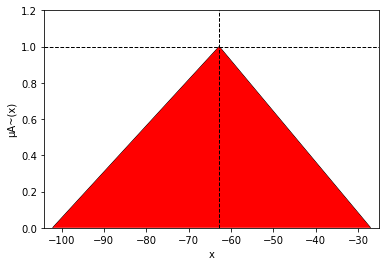

<Figure size 432x288 with 0 Axes>

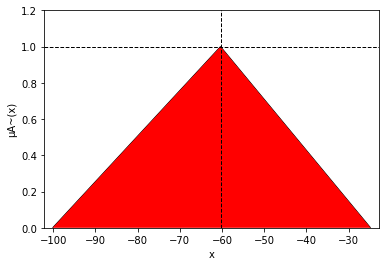

<Figure size 432x288 with 0 Axes>

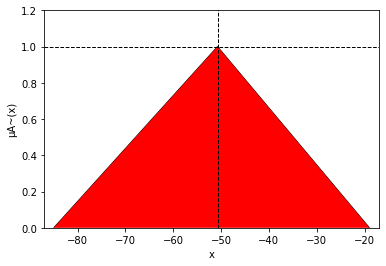

<Figure size 432x288 with 0 Axes>

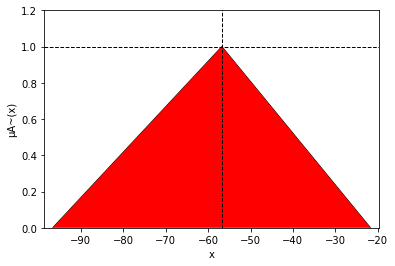

<Figure size 432x288 with 0 Axes>

[Point2D(0, 2437/23708)]


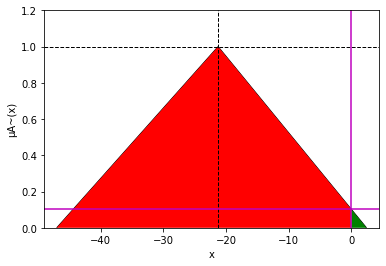

<Figure size 432x288 with 0 Axes>

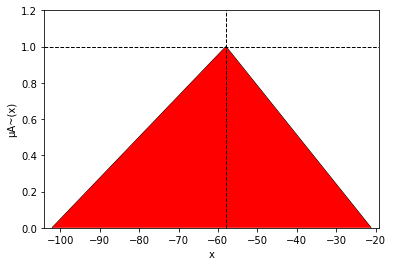

<Figure size 432x288 with 0 Axes>

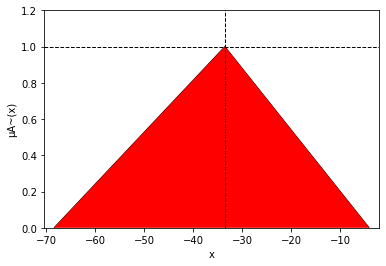

<Figure size 432x288 with 0 Axes>

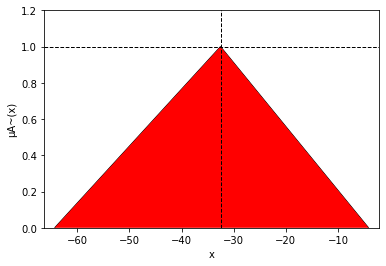

<Figure size 432x288 with 0 Axes>

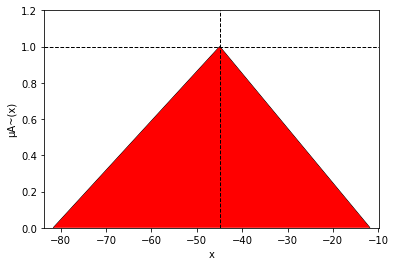

<Figure size 432x288 with 0 Axes>

[Point2D(0, 13107/15614)]


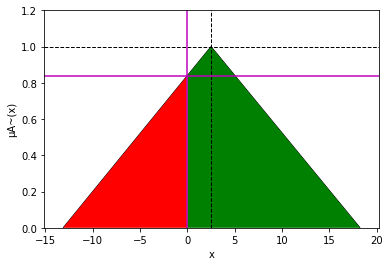

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6857/7857)]


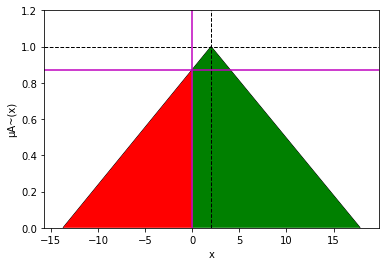

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1267100000000000/1781500000000001)]


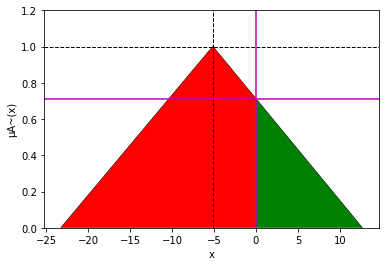

<Figure size 432x288 with 0 Axes>

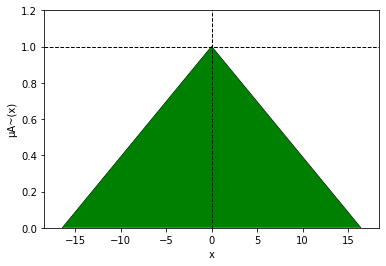

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1460100000000000/1699200000000001)]


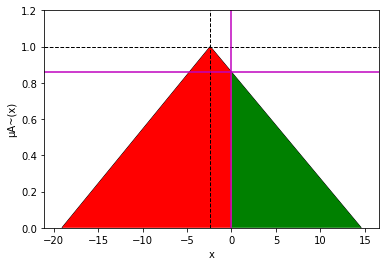

<Figure size 432x288 with 0 Axes>

[Point2D(0, 15829000000000000/16788000000000003)]


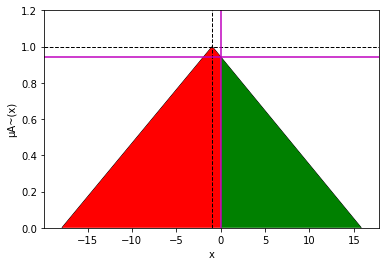

<Figure size 432x288 with 0 Axes>

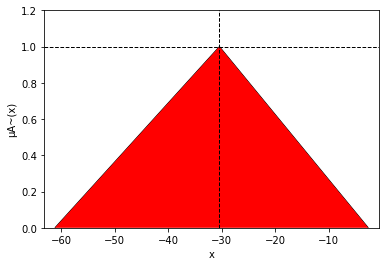

<Figure size 432x288 with 0 Axes>

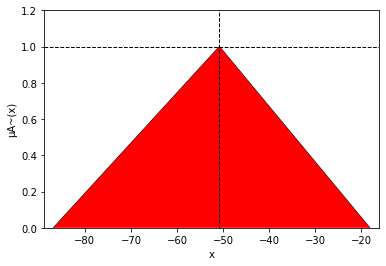

<Figure size 432x288 with 0 Axes>

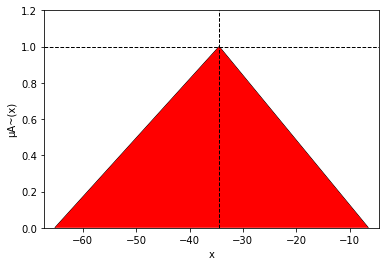

<Figure size 432x288 with 0 Axes>

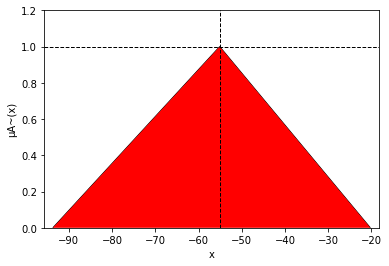

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

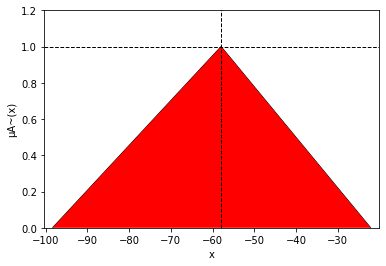

<Figure size 432x288 with 0 Axes>

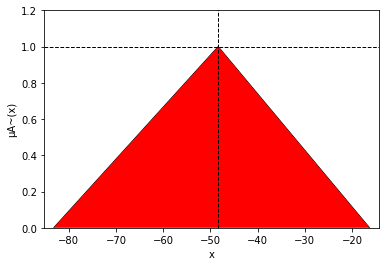

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 513500000000001/2401500000000001)]


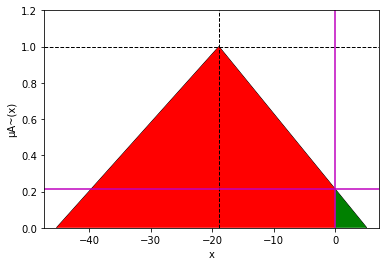

<Figure size 432x288 with 0 Axes>

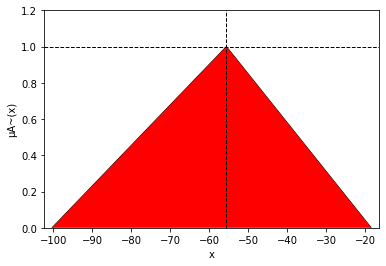

<Figure size 432x288 with 0 Axes>

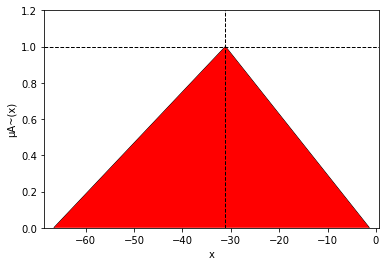

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

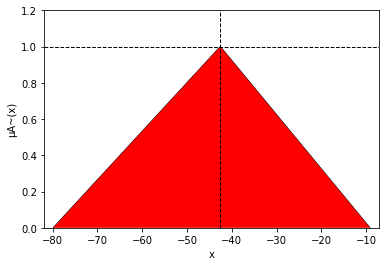

<Figure size 432x288 with 0 Axes>

[Point2D(0, 5666/8115)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 1193900000000000/1633000000000001)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 15369/18122)]


<Figure size 432x288 with 0 Axes>

[Point2D(0, 1460100000000000/1699200000000001)]


<Figure size 432x288 with 0 Axes>

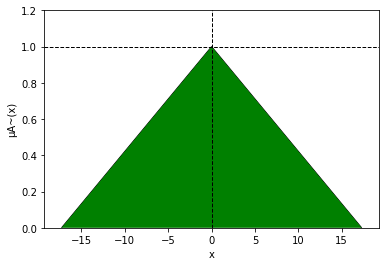

<Figure size 432x288 with 0 Axes>

[Point2D(0, 8051/8767)]


<Figure size 432x288 with 0 Axes>

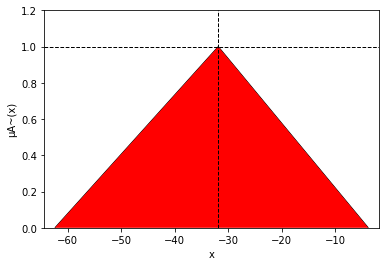

<Figure size 432x288 with 0 Axes>

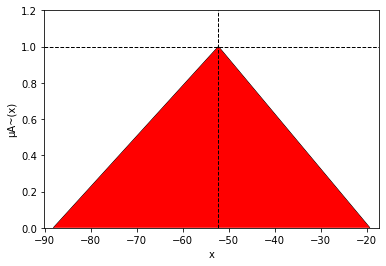

<Figure size 432x288 with 0 Axes>

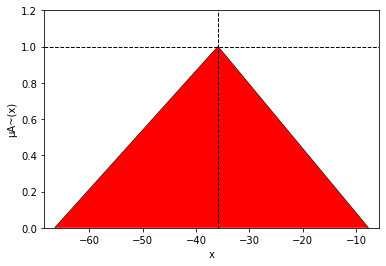

<Figure size 432x288 with 0 Axes>

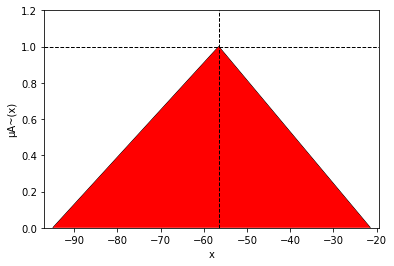

<Figure size 432x288 with 0 Axes>

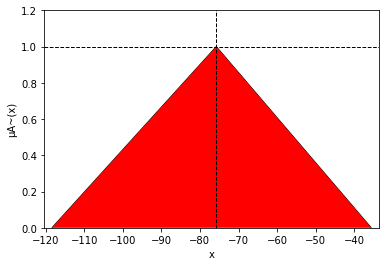

<Figure size 432x288 with 0 Axes>

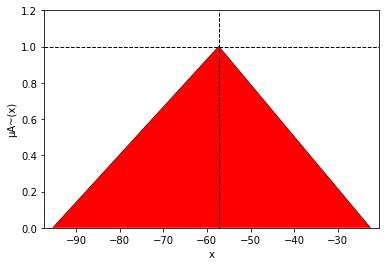

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

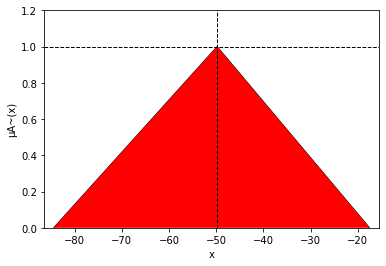

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1969/12125)]


<Figure size 432x288 with 0 Axes>

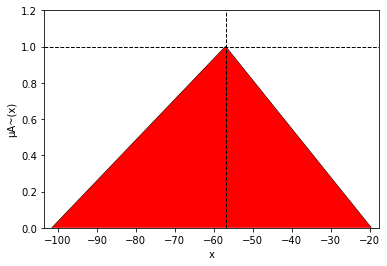

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

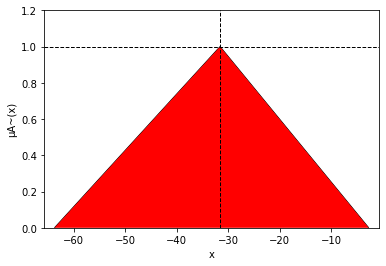

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[Point2D(0, 6280/8013)]


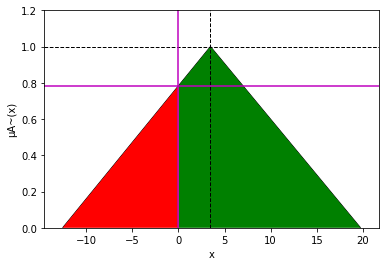

<Figure size 432x288 with 0 Axes>

[Point2D(0, 1197/1466)]


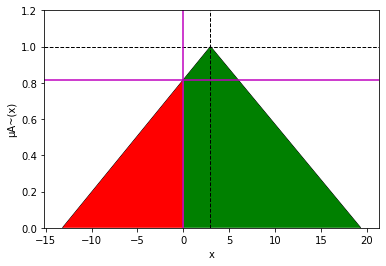

<Figure size 432x288 with 0 Axes>

[Point2D(0, 4724/6119)]


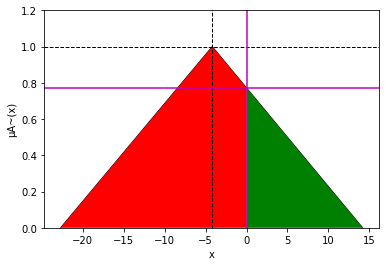

<Figure size 432x288 with 0 Axes>

[Point2D(0, 15829000000000000/16788000000000003)]


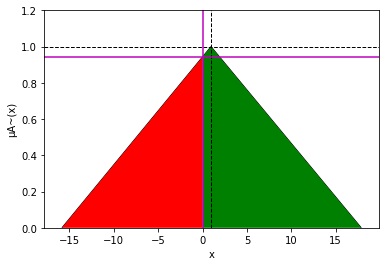

<Figure size 432x288 with 0 Axes>

[Point2D(0, 8051/8767)]


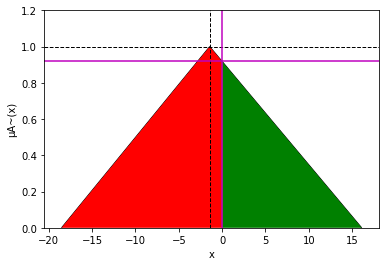

<Figure size 432x288 with 0 Axes>

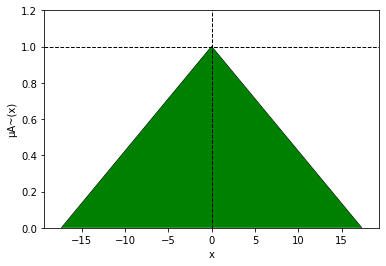

<Figure size 432x288 with 0 Axes>

In [10]:
#Graphs for all Triangular Fuzzy Numbers.
Intersection_pnts = []
for i in range(0,len(Triangular_FuzzyNums)):
    l = Triangular_FuzzyNums.iloc[i,0]
    m = Triangular_FuzzyNums.iloc[i,1]
    n = Triangular_FuzzyNums.iloc[i,2]
    
    plt.xlabel("x")
    plt.ylabel("µA~(x)")
    plt.ylim(0,1.2)
    plt.xlim(l - 2, n + 2)

    pnts = np.array([[l,0], [m,1], [n,0]])
    f_triangle = Polygon(pnts, closed=False, edgecolor = "black", facecolor = "white")
    ax = plt.gca()
    ax.add_patch(f_triangle)
    
    if l < 0 and m > 0:
        p1, p2, p3, p4 = Point(0, 0), Point(0, 1), Point(l, 0), Point(m, 1)
        l1 = Line(p1, p2)
        s1 = Segment(p3, p4)  
        showIntersection = l1.intersection(s1)
        print(showIntersection)
        Intersection_pnts.append(showIntersection)
    elif m < 0 and n > 0: 
        p1, p2, p3, p4 = Point(0, 0), Point(0, 1), Point(n, 0), Point(m, 1)
        l1 = Line(p1, p2)
        s1 = Segment(p3, p4)  
        showIntersection = l1.intersection(s1)
        print(showIntersection)
        Intersection_pnts.append(showIntersection)
    else:
        Intersection_pnts.append([[0,0]])

    plt.axvline(x = m, color = "black", linestyle = "--", linewidth = 1)

    if l < 0 and m > 0 and n > 0:
        plt.axhline(y = 1, color = "black", linestyle = "--", linewidth = 1)
        plt.axvline(x = 0, color = "m")
        plt.axhline(y = showIntersection[0][1], color = "m")   
    elif m < 0 and n > 0:
        plt.axhline(y = 1, color = "black", linestyle = "--", linewidth = 1)
        plt.axvline(x = 0, color = "m")
        plt.axhline(y = showIntersection[0][1], color = "m")
    elif n < 0:
        plt.axhline(y = 1, color = "black", linestyle = "--", linewidth = 1)
    else: 
        plt.axhline(y = 1, color = "black", linestyle = "--", linewidth = 1)

    plt.figure()

    if l < 0  and m > 0 and n > 0:
        ax.add_patch(Polygon([(0, 0), (0, showIntersection[0][1]), (m, 1), (n, 0)],
                               closed=True, facecolor='green'))
        ax.add_patch(Polygon([(0, 0), (0, showIntersection[0][1]), (l, 0)],
                               closed=True, facecolor='red'))
    elif m < 0 and n > 0:
        ax.add_patch(Polygon([(0, 0), (0, showIntersection[0][1]), (n, 0)],
                               closed=True, facecolor='green'))
        ax.add_patch(Polygon([(l, 0), (m, 1), (0, showIntersection[0][1]), (0, 0)],
                               closed=True, facecolor='red'))
    elif n < 0:
        ax.add_patch(Polygon([(l, 0), (m, 1), (n, 0)],
                               closed=True, facecolor='red'))
    else:
        ax.add_patch(Polygon([(l, 0), (m, 1), (n, 0)],
                               closed=True, facecolor='green'))


    plt.show()

In [11]:
#Fuzzy Preference Relational Matrix[E].
Intersection = []
for i in range(0,len(Triangular_FuzzyNums_1)):
    Intersection.append(Intersection_pnts[i][0][1])

Triangular_FuzzyNums_1["Intersection height"] = Intersection

E = []

for i in range(0,len(Triangular_FuzzyNums)):
    l = Triangular_FuzzyNums_1.iloc[i,0]
    m = Triangular_FuzzyNums_1.iloc[i,1]
    n = Triangular_FuzzyNums_1.iloc[i,2]
    h = round(Triangular_FuzzyNums_1.iloc[i,3], 3)
    
    if l < 0 and m > 0 and n > 0:
        pos_Area = (1/2 * (n-m)) + (1/2 * (m) * (1-h)) + (h * m)
        neg_Area = 1/2 * (0-l) * h
    elif m < 0 and n > 0:
        pos_Area = 1/2 * (n) * h
        neg_Area = (1/2 * abs((m-l))) + (1/2 * (0-m) * (1-h)) + ((0-m) * h)
    elif n < 0:
        pos_Area = 0
        neg_Area = (1/2 * (n-m)) + (1/2 * (m-l))
    else:
        pos_Area = (1/2 * (n-m)) + (1/2 * (m-l))
        neg_Area = 0
    
    total_Area = pos_Area + neg_Area
    corr_e = round(pos_Area/total_Area, 3)
    E.append(corr_e)

E_array = np.array(E)
TriFuzzNo_sqrt = int(np.sqrt(len(Triangular_FuzzyNums)))
print("Matrix Size: " + str(TriFuzzNo_sqrt) + "*" + str(TriFuzzNo_sqrt) + "\n")
E_2D_array = np.reshape(E_array, (TriFuzzNo_sqrt, TriFuzzNo_sqrt))
np.fill_diagonal(E_2D_array, 0.5)
print(E_2D_array)

Matrix Size: 21*21

[[0.5 0.155 0.407 0.118 0.016 0.109 0.077 0.096 0.183 0.127 0.765 0.121
  0.469 0.502 0.272 1.0 1.0 0.999 1.0 1.0 1.0]
 [0.845 0.5 0.792 0.421 0.180 0.408 0.339 0.373 0.550 0.429 0.972 0.403
  0.808 0.838 0.642 1.0 1.0 1.0 1.0 1.0 1.0]
 [0.593 0.208 0.5 0.163 0.032 0.152 0.112 0.135 0.242 0.171 0.833 0.162
  0.556 0.591 0.338 1.0 1.0 1.0 1.0 1.0 1.0]
 [0.882 0.579 0.837 0.5 0.237 0.487 0.412 0.448 0.624 0.507 0.985 0.476
  0.847 0.875 0.702 1.0 1.0 1.0 1.0 1.0 1.0]
 [0.984 0.820 0.968 0.763 0.5 0.756 0.696 0.722 0.850 0.762 1.0 0.730
  0.966 0.980 0.889 1.0 1.0 1.0 1.0 1.0 1.0]
 [0.891 0.592 0.848 0.513 0.244 0.5 0.423 0.460 0.637 0.520 0.989 0.489
  0.856 0.884 0.714 1.0 1.0 1.0 1.0 1.0 1.0]
 [0.923 0.661 0.888 0.588 0.304 0.577 0.5 0.538 0.702 0.592 0.997 0.560
  0.892 0.917 0.768 1.0 1.0 1.0 1.0 1.0 1.0]
 [0.904 0.627 0.865 0.552 0.278 0.540 0.462 0.5 0.669 0.557 0.992 0.526
  0.872 0.898 0.739 1.0 1.0 1.0 1.0 1.0 1.0]
 [0.817 0.450 0.758 0.376 0.150 0.363 0.298 

In [12]:
#Priority Index/ Ranking of Stretches.
PI = []
for i in range(0,len(E_2D_array)):
    PI_Sum = sum(E_2D_array[i]) - (len(E_2D_array) * 0.5)
    PI.append(PI_Sum)
    
Ranking = pd.DataFrame()
Ranking["Priority Index"] = PI
Ranking["Stretch No."] = row_index
Ranking["Rank"] = Ranking["Priority Index"].rank(ascending = False, method = 'max')
Ranking = Ranking.set_index("Stretch No.")
print(Ranking)
Ranking.to_excel("Fuzzy_TOPSIS_Ranking.xlsx")

                 Priority Index  Rank
Stretch No.                          
A1           -0.584075927734375  14.0
A2             4.00006103515625   8.0
A3            0.287994384765625  11.0
A4             4.89788818359375   6.0
A5             7.88610839843750   1.0
A6             5.05987548828125   5.0
A7             5.90686035156250   2.0
A8             5.48132324218750   3.0
A9             3.43792724609375   9.0
A10            4.80108642578125   7.0
A11           -2.99488830566406  15.0
A12            5.11279296875000   4.0
A13          -0.119628906250000  12.0
A14          -0.537597656250000  13.0
A15            2.25000000000000  10.0
A16           -8.48202514648438  21.0
A17           -8.31906127929688  20.0
A18           -6.14596557617188  16.0
A19           -7.65899658203125  19.0
A20           -6.93807983398438  17.0
A21           -7.34210205078125  18.0
